# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:54:15.744331: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:54:19.171229
2025-04-14 21:54:19.171229


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:54:13"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

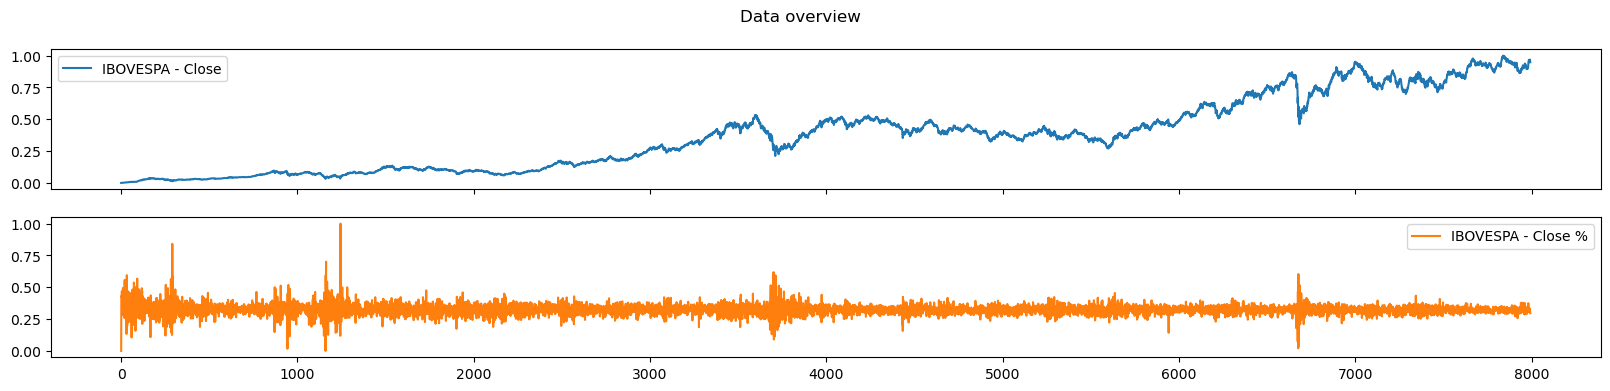

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

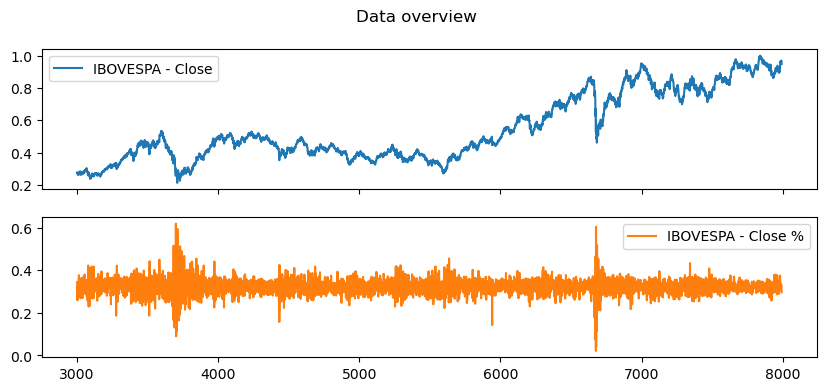

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

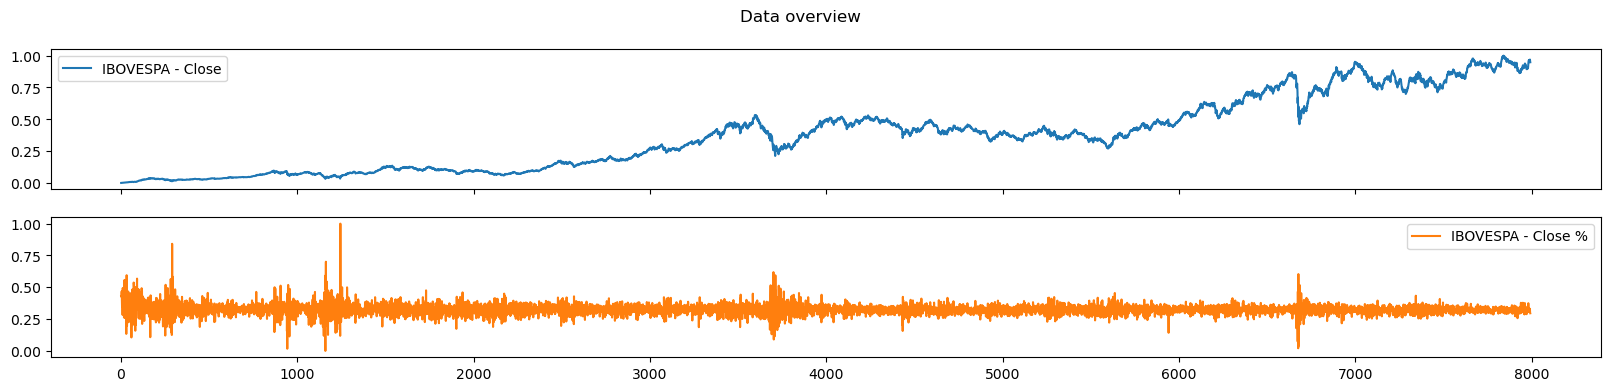

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

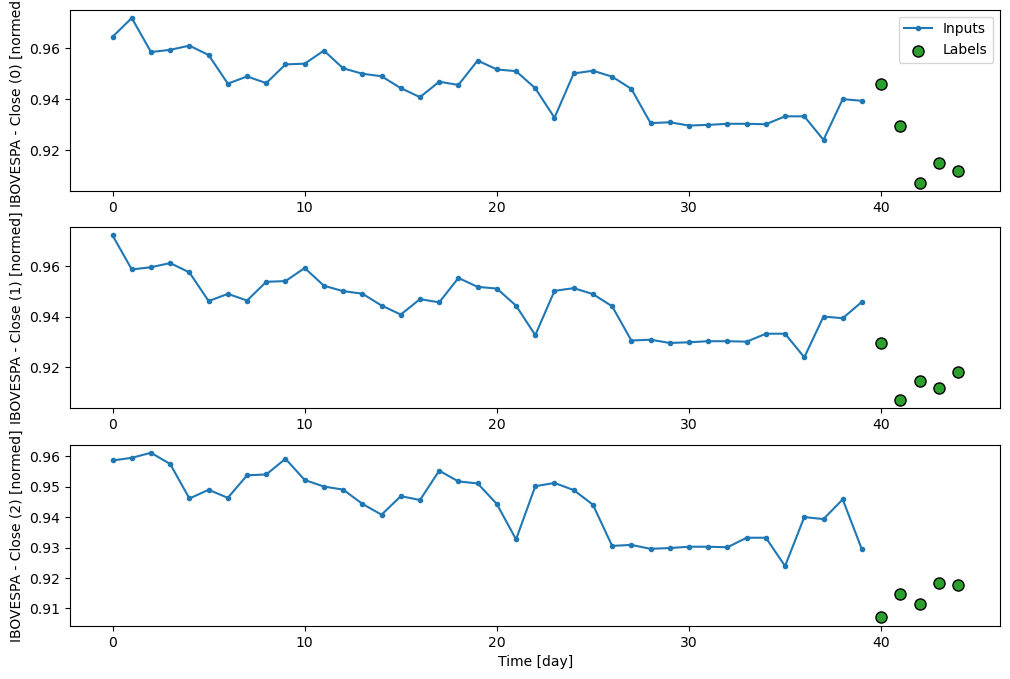

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:20 3s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 99.6742 - mean_squared_error: 1.2313e-04 - root_mean_squared_error: 0.0109  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 84.8352 - mean_squared_error: 1.3555e-04 - root_mean_squared_error: 0.0115

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 78.8344 - mean_squared_error: 1.6657e-04 - root_mean_squared_error: 0.0127

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 74.5828 - mean_squared_error: 1.7174e-04 - root_mean_squared_error: 0.0129

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 70.5260 - mean_squared_error: 1.7040e-04 - root_mean_squared_error: 0.0129

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 66.6601 - mean_squared_error: 1.6592e-04 - root_mean_squared_error: 0.0128

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 63.1342 - mean_squared_error: 1.6047e-04 - root_mean_squared_error: 0.0125

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 60.1500 - mean_squared_error: 1.5772e-04 - root_mean_squared_error: 0.0124

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 57.5926 - mean_squared_error: 1.5783e-04 - root_mean_squared_error: 0.0125

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 55.4607 - mean_squared_error: 1.6114e-04 - root_mean_squared_error: 0.0126

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.5468 - mean_squared_error: 1.6354e-04 - root_mean_squared_error: 0.0127

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.9076 - mean_squared_error: 1.6590e-04 - root_mean_squared_error: 0.0128

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.4563 - mean_squared_error: 1.6866e-04 - root_mean_squared_error: 0.0129

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.7816 - mean_squared_error: 1.7394e-04 - root_mean_squared_error: 0.0131

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.6798 - mean_squared_error: 1.8056e-04 - root_mean_squared_error: 0.0133

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.3024 - mean_squared_error: 1.8798e-04 - root_mean_squared_error: 0.0136

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 45.0028 - mean_squared_error: 1.9346e-04 - root_mean_squared_error: 0.0138

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 44.0868 - mean_squared_error: 1.9673e-04 - root_mean_squared_error: 0.0139

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 43.2318 - mean_squared_error: 1.9968e-04 - root_mean_squared_error: 0.0140

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 42.4194 - mean_squared_error: 2.0202e-04 - root_mean_squared_error: 0.0141

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 41.6753 - mean_squared_error: 2.0428e-04 - root_mean_squared_error: 0.0142

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 40.9705 - mean_squared_error: 2.0614e-04 - root_mean_squared_error: 0.0142

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 40.3175 - mean_squared_error: 2.0825e-04 - root_mean_squared_error: 0.0143

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 39.5412 - mean_squared_error: 2.1507e-04 - root_mean_squared_error: 0.0145

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 39.0048 - mean_squared_error: 2.2179e-04 - root_mean_squared_error: 0.0147

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 38.3094 - mean_squared_error: 2.2943e-04 - root_mean_squared_error: 0.0149

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 37.8031 - mean_squared_error: 2.3434e-04 - root_mean_squared_error: 0.0151

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 37.3126 - mean_squared_error: 2.3894e-04 - root_mean_squared_error: 0.0152

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 36.8503 - mean_squared_error: 2.4566e-04 - root_mean_squared_error: 0.0154

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 36.4096 - mean_squared_error: 2.5387e-04 - root_mean_squared_error: 0.0156

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 35.9804 - mean_squared_error: 2.6148e-04 - root_mean_squared_error: 0.0158

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 35.5619 - mean_squared_error: 2.6857e-04 - root_mean_squared_error: 0.0160

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 35.1545 - mean_squared_error: 2.7556e-04 - root_mean_squared_error: 0.0162

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 34.7586 - mean_squared_error: 2.8265e-04 - root_mean_squared_error: 0.0164

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 34.2466 - mean_squared_error: 2.9208e-04 - root_mean_squared_error: 0.0167

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 33.8922 - mean_squared_error: 3.0695e-04 - root_mean_squared_error: 0.0170

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 33.4598 - mean_squared_error: 3.3550e-04 - root_mean_squared_error: 0.0176

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 33.1542 - mean_squared_error: 3.6109e-04 - root_mean_squared_error: 0.0180

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 32.8720 - mean_squared_error: 4.0249e-04 - root_mean_squared_error: 0.0187

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 32.6090 - mean_squared_error: 4.5485e-04 - root_mean_squared_error: 0.0195

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 32.3558 - mean_squared_error: 5.0764e-04 - root_mean_squared_error: 0.0202

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 32.1077 - mean_squared_error: 5.5797e-04 - root_mean_squared_error: 0.0209

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 31.8629 - mean_squared_error: 6.0522e-04 - root_mean_squared_error: 0.0216

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 31.6216 - mean_squared_error: 6.4959e-04 - root_mean_squared_error: 0.0223

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 31.3879 - mean_squared_error: 6.9343e-04 - root_mean_squared_error: 0.0229

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 31.0815 - mean_squared_error: 7.4813e-04 - root_mean_squared_error: 0.0237

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 30.8553 - mean_squared_error: 7.8628e-04 - root_mean_squared_error: 0.0242

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 30.5633 - mean_squared_error: 8.3491e-04 - root_mean_squared_error: 0.0250

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 30.3483 - mean_squared_error: 8.6905e-04 - root_mean_squared_error: 0.0255

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 30.0675 - mean_squared_error: 9.1193e-04 - root_mean_squared_error: 0.0261

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 29.7982 - mean_squared_error: 9.5394e-04 - root_mean_squared_error: 0.0267

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 29.6001 - mean_squared_error: 9.8351e-04 - root_mean_squared_error: 0.0271

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 29.4062 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0275    

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 29.2202 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 28.9788 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 28.8032 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 28.6335 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 28.4687 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0296

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 28.3085 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 28.1517 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 27.9978 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 27.8455 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 27.6948 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 27.5949 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 27.4956 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 27.3521 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 27.2117 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 27.0742 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 26.9409 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 26.8102 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 26.6804 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 26.5949 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 26.4674 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 26.2991 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 26.1338 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358 - val_loss: 0.0617 - val_mean_absolute_error: 0.0617 - val_mean_absolute_percentage_error: 6.5327 - val_mean_squared_error: 0.0044 - val_root_mean_squared_error: 0.0660 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.6152 - mean_absolute_error: 0.6152 - mean_absolute_percentage_error: 8171.1758 - mean_squared_error: 0.3785 - root_mean_squared_error: 0.6153

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6162 - mean_absolute_error: 0.6162 - mean_absolute_percentage_error: 6265.8145 - mean_squared_error: 0.3798 - root_mean_squared_error: 0.6163 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6056 - mean_absolute_error: 0.6056 - mean_absolute_percentage_error: 4920.6738 - mean_squared_error: 0.3674 - root_mean_squared_error: 0.6060

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5898 - mean_absolute_error: 0.5898 - mean_absolute_percentage_error: 4396.3696 - mean_squared_error: 0.3509 - root_mean_squared_error: 0.5918

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5924 - mean_absolute_error: 0.5924 - mean_absolute_percentage_error: 3993.1851 - mean_squared_error: 0.3841 - root_mean_squared_error: 0.6177

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5831 - mean_absolute_error: 0.5831 - mean_absolute_percentage_error: 3673.8000 - mean_squared_error: 0.3887 - root_mean_squared_error: 0.6218

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5702 - mean_absolute_error: 0.5702 - mean_absolute_percentage_error: 3464.2107 - mean_squared_error: 0.3830 - root_mean_squared_error: 0.6173

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5548 - mean_absolute_error: 0.5548 - mean_absolute_percentage_error: 3276.0923 - mean_squared_error: 0.3737 - root_mean_squared_error: 0.6095

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5382 - mean_absolute_error: 0.5382 - mean_absolute_percentage_error: 3106.5710 - mean_squared_error: 0.3628 - root_mean_squared_error: 0.6001

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5163 - mean_absolute_error: 0.5163 - mean_absolute_percentage_error: 2907.3960 - mean_squared_error: 0.3477 - root_mean_squared_error: 0.5865

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5005 - mean_absolute_error: 0.5005 - mean_absolute_percentage_error: 2775.1423 - mean_squared_error: 0.3365 - root_mean_squared_error: 0.5762

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4852 - mean_absolute_error: 0.4852 - mean_absolute_percentage_error: 2655.3804 - mean_squared_error: 0.3257 - root_mean_squared_error: 0.5660

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4706 - mean_absolute_error: 0.4706 - mean_absolute_percentage_error: 2546.4143 - mean_squared_error: 0.3154 - root_mean_squared_error: 0.5560

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4566 - mean_absolute_error: 0.4566 - mean_absolute_percentage_error: 2446.8127 - mean_squared_error: 0.3056 - root_mean_squared_error: 0.5464

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4434 - mean_absolute_error: 0.4434 - mean_absolute_percentage_error: 2355.4583 - mean_squared_error: 0.2963 - root_mean_squared_error: 0.5371

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4270 - mean_absolute_error: 0.4270 - mean_absolute_percentage_error: 2244.8784 - mean_squared_error: 0.2848 - root_mean_squared_error: 0.5253

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4118 - mean_absolute_error: 0.4118 - mean_absolute_percentage_error: 2145.3455 - mean_squared_error: 0.2741 - root_mean_squared_error: 0.5141

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4012 - mean_absolute_error: 0.4012 - mean_absolute_percentage_error: 2076.9851 - mean_squared_error: 0.2667 - root_mean_squared_error: 0.5061

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - mean_absolute_percentage_error: 2013.3969 - mean_squared_error: 0.2596 - root_mean_squared_error: 0.4985

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 1954.0461 - mean_squared_error: 0.2530 - root_mean_squared_error: 0.4912

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3726 - mean_absolute_error: 0.3726 - mean_absolute_percentage_error: 1898.5220 - mean_squared_error: 0.2466 - root_mean_squared_error: 0.4842

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3641 - mean_absolute_error: 0.3641 - mean_absolute_percentage_error: 1846.4657 - mean_squared_error: 0.2407 - root_mean_squared_error: 0.4775

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1797.5436 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4711

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3482 - mean_absolute_error: 0.3482 - mean_absolute_percentage_error: 1751.4626 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4649

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1736.6907 - mean_squared_error: 0.2279 - root_mean_squared_error: 0.4629

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1707.9766 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4589

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 1666.8743 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4532

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3272 - mean_absolute_error: 0.3272 - mean_absolute_percentage_error: 1627.9492 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4477

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1591.0291 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4424

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1555.9509 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4372

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3071 - mean_absolute_error: 0.3071 - mean_absolute_percentage_error: 1511.8099 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4307

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3016 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 1480.5221 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4260

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1441.0146 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4199

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1412.9135 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4155

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1386.0283 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.4113

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1360.2733 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.4072

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2763 - mean_absolute_error: 0.2763 - mean_absolute_percentage_error: 1335.5791 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.4033

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1311.9148 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3995

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1289.2095 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3958

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1267.3779 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3923

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1253.2854 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3900

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1232.8055 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3867

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1213.0721 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3834

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1194.0398 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3802

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2495 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 1175.6698 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3771

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1157.9348 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3741

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1135.2114 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3702

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1118.8179 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3674

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1102.9491 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3647

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1082.5629 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3611

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2316 - mean_absolute_error: 0.2316 - mean_absolute_percentage_error: 1067.8204 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3585

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1053.5228 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3559

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1039.6499 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3534

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1026.1821 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3510

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 1008.8228 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3478

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 996.2313 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3455 

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 983.9905 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3432

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 972.0841 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3410

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 960.5004 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3388

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 945.5333 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3359

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 934.6489 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3339

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 920.5681 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3312

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 910.3168 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3292

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 900.3182 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3272

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 890.5628 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3253

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 881.0411 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3235

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1982 - mean_absolute_error: 0.1982 - mean_absolute_percentage_error: 871.7452 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3216

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 862.6716 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3199

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1946 - mean_absolute_error: 0.1946 - mean_absolute_percentage_error: 850.9005 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3175

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 842.3056 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3158

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 833.9033 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3142

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 825.6871 - mean_squared_error: 0.1149 - root_mean_squared_error: 0.3125

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 817.6501 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3109

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 809.7864 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3093

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 802.0901 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3077

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 794.5558 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3062

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1843 - mean_absolute_error: 0.1843 - mean_absolute_percentage_error: 789.6298 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3052 - val_loss: 0.0596 - val_mean_absolute_error: 0.0596 - val_mean_absolute_percentage_error: 6.3157 - val_mean_squared_error: 0.0040 - val_root_mean_squared_error: 0.0635 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.6186 - mean_absolute_error: 0.6186 - mean_absolute_percentage_error: 8214.4209 - mean_squared_error: 0.3826 - root_mean_squared_error: 0.6186

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.6172 - mean_absolute_error: 0.6172 - mean_absolute_percentage_error: 6283.4727 - mean_squared_error: 0.3810 - root_mean_squared_error: 0.6172 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6108 - mean_absolute_error: 0.6108 - mean_absolute_percentage_error: 4948.5928 - mean_squared_error: 0.3732 - root_mean_squared_error: 0.6109

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6042 - mean_absolute_error: 0.6042 - mean_absolute_percentage_error: 4461.6929 - mean_squared_error: 0.3656 - root_mean_squared_error: 0.6045

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5954 - mean_absolute_error: 0.5954 - mean_absolute_percentage_error: 4112.9966 - mean_squared_error: 0.3558 - root_mean_squared_error: 0.5961

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 3836.4551 - mean_squared_error: 0.3444 - root_mean_squared_error: 0.5862

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5673 - mean_absolute_error: 0.5673 - mean_absolute_percentage_error: 3530.6753 - mean_squared_error: 0.3277 - root_mean_squared_error: 0.5710

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5517 - mean_absolute_error: 0.5517 - mean_absolute_percentage_error: 3332.0647 - mean_squared_error: 0.3145 - root_mean_squared_error: 0.5585

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5346 - mean_absolute_error: 0.5346 - mean_absolute_percentage_error: 3153.5923 - mean_squared_error: 0.3014 - root_mean_squared_error: 0.5457

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5171 - mean_absolute_error: 0.5171 - mean_absolute_percentage_error: 2993.3184 - mean_squared_error: 0.2889 - root_mean_squared_error: 0.5332

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4999 - mean_absolute_error: 0.4999 - mean_absolute_percentage_error: 2849.2329 - mean_squared_error: 0.2772 - root_mean_squared_error: 0.5211

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4833 - mean_absolute_error: 0.4833 - mean_absolute_percentage_error: 2719.2329 - mean_squared_error: 0.2663 - root_mean_squared_error: 0.5095

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4675 - mean_absolute_error: 0.4675 - mean_absolute_percentage_error: 2601.4868 - mean_squared_error: 0.2562 - root_mean_squared_error: 0.4986

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4525 - mean_absolute_error: 0.4525 - mean_absolute_percentage_error: 2494.3948 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4882

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4384 - mean_absolute_error: 0.4384 - mean_absolute_percentage_error: 2396.6055 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4784

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4251 - mean_absolute_error: 0.4251 - mean_absolute_percentage_error: 2306.9858 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4691

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4127 - mean_absolute_error: 0.4127 - mean_absolute_percentage_error: 2224.5635 - mean_squared_error: 0.2225 - root_mean_squared_error: 0.4603

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4010 - mean_absolute_error: 0.4010 - mean_absolute_percentage_error: 2148.4907 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4520

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 2078.0498 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4442

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3797 - mean_absolute_error: 0.3797 - mean_absolute_percentage_error: 2012.6299 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4367

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3699 - mean_absolute_error: 0.3699 - mean_absolute_percentage_error: 1951.6927 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4296

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3607 - mean_absolute_error: 0.3607 - mean_absolute_percentage_error: 1894.7743 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4228

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3520 - mean_absolute_error: 0.3520 - mean_absolute_percentage_error: 1841.4850 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4164

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3437 - mean_absolute_error: 0.3437 - mean_absolute_percentage_error: 1791.4811 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.4102

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1744.4491 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.4043

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 1700.1208 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3987

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1658.2670 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3933

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1605.9476 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3865

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1569.0874 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3816

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1534.0845 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3768

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1500.7991 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3723

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1469.1039 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3679

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1438.8845 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3637

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1410.0327 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3597

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1373.5349 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3545

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2677 - mean_absolute_error: 0.2677 - mean_absolute_percentage_error: 1347.5283 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3507

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1314.5305 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3459

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1290.9717 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3425

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1261.0187 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3380

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1239.5626 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3348

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 1218.9187 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3317

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1199.0375 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3287

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 1179.8729 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3258

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1155.3680 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3220

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1137.7324 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3193

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1115.1395 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3158

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1098.8444 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3132

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 1083.0752 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.3107

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1067.8058 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3083

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1053.0128 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.3059

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 1033.9890 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3028

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1020.2209 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.3005

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1006.8591 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.2983

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 993.8837 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.2962 

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 981.2784 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.2941

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 969.0294 - mean_squared_error: 0.1011 - root_mean_squared_error: 0.2920

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 957.1189 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2900

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 945.5331 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2881

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 934.2591 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2861

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 923.2828 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2843

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 912.5914 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2824

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 902.1733 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2806

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 892.0186 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2788

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 878.8706 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2765

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 869.2910 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.2749

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 856.8749 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2727

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 844.8515 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2705

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 836.0786 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2690

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 824.6953 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2669

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 816.3832 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2654

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 808.2573 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2640

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1730 - mean_absolute_error: 0.1730 - mean_absolute_percentage_error: 800.3105 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2625

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 792.5368 - mean_squared_error: 0.0832 - root_mean_squared_error: 0.2611

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 784.9305 - mean_squared_error: 0.0825 - root_mean_squared_error: 0.2597

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 775.0417 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2579

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 772.6184 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2575 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_absolute_percentage_error: 1.4407 - val_mean_squared_error: 2.9914e-04 - val_root_mean_squared_error: 0.0173 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 4358.4609 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.3283

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 3080.2373 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.3243 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 2600.2664 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.3180

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 2236.9905 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.3055

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 2030.9452 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2939

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2741 - mean_absolute_error: 0.2741 - mean_absolute_percentage_error: 1865.0433 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2829

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1726.3920 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2725

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1608.7849 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2631

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2359 - mean_absolute_error: 0.2359 - mean_absolute_percentage_error: 1507.5527 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2544

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1419.5808 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2465

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1342.3398 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2393

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 1273.9822 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2326

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 1194.2397 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2246

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 1141.4753 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2191

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 1078.8412 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2124

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1721 - mean_absolute_error: 0.1721 - mean_absolute_percentage_error: 1023.5237 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2063

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 986.0789 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.2021 

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 951.6085 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1981

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 919.7646 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1943

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1528 - mean_absolute_error: 0.1528 - mean_absolute_percentage_error: 890.2463 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.1908

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 862.8031 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1875

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 829.0764 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1833

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - mean_absolute_percentage_error: 805.6849 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1804

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 783.7411 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1776

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 756.4981 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1740

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 737.4266 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1715

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 719.4086 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1691

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 702.3575 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1668

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 686.1936 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1646

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 670.8460 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1625

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 656.2531 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1605

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 642.3575 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1586

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 629.1080 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1567

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 612.3688 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1543

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 600.4565 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1526

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 585.3602 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1504

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 574.5869 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1488

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 560.8960 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1467

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 547.9169 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1448

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 538.6155 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1434

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 526.7499 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1416

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 518.2275 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1403

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 510.0081 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1390

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 502.0753 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1378

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 494.4138 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1365

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 487.0095 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1354

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 479.8488 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1342

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 470.6597 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1328

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 464.0218 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1317

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 457.5895 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1306

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 451.3533 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1296

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 445.3044 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1286

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 439.4339 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1277

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 433.7337 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1267

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 430.0245 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1261

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 424.5923 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1252

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 417.5835 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1240

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 412.4943 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1231

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 405.9202 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1220

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 401.1409 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1212

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 396.4858 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1204

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 391.9498 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1196

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 387.5281 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1188

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 381.8024 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1178

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 377.6304 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1171

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 372.2238 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1161

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 368.2807 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1155

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 364.4296 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1148

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 360.6671 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1141

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 356.9901 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1134

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 353.3959 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1128

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 349.8813 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1122

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 346.4438 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1116

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 343.0808 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1109

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 340.8826 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1106 - val_loss: 0.0299 - val_mean_absolute_error: 0.0299 - val_mean_absolute_percentage_error: 3.1677 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0333 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.1550 - mean_absolute_error: 0.1550 - mean_absolute_percentage_error: 2057.6326 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1551

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 1429.8389 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1477 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 1180.3674 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1392

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 1016.3777 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1303

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 903.3776 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1233 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 819.2878 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1176

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 731.9813 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1110

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 679.8975 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1068

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 622.3200 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1019

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 585.9755 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0986

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 554.1675 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0957

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 526.1122 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0930

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 501.2408 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0905

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 478.9476 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0883

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 458.8321 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0862

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 434.8104 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0836

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 418.5899 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0819

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 403.6875 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0802

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 389.9428 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0787

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 377.2278 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0772

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 365.4274 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0759

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 354.4450 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0745

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 344.1943 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0733

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 334.5947 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0721

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 322.7029 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0707

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 314.3989 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0696

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 306.5668 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0686

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 299.1654 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0677

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 292.1585 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 283.3727 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 277.1657 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 269.3518 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0638

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 263.8096 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 258.5191 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0623

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 253.4634 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0616

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 248.6264 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 242.4953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0601

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 238.1180 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0595

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 233.9166 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0589

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 229.8794 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0583

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 225.9972 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 222.2603 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 217.4892 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 212.9435 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0559

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 209.6721 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0555

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 205.4824 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0549

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 202.4616 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0544

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 199.5389 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0540

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 196.7097 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 193.9690 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0532

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 191.3126 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 188.7369 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0524

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 185.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 183.0201 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 179.9246 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0511

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 177.6794 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 175.4963 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0504

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 173.3728 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 171.3062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0497

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 169.2941 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0494

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 167.3345 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0491

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 164.7997 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0487

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 162.9545 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0484

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 161.1551 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0481

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 159.3997 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 157.6872 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0476

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 156.0155 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0473

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 153.8477 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0470

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 151.7464 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 150.2122 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0464

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 148.7125 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 147.2460 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0460

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 145.8116 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0458

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 144.4082 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0455

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 143.4908 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0454 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1644 - val_mean_squared_error: 1.8465e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 1634.4097 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1233

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 1223.7588 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1180 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 922.1315 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1075 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 789.2156 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1000

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 699.3765 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0943

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 632.6083 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0897

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 579.2498 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0857

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 536.0362 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0822

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 488.7995 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0783

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 450.2065 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0749

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 425.4987 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 403.7210 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0706

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 384.3977 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0687

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 367.1018 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0670

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 351.5177 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0654

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 337.3707 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0639

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 324.4601 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0625

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 312.6289 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0612

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 301.7386 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0600

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 291.6852 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 282.3701 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 273.7178 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0568

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 265.6613 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 258.1339 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 251.0771 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 244.4459 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 238.2027 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 232.3113 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 224.9520 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 218.1028 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 213.2683 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 208.6719 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0487

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 204.2943 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 200.1199 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 196.1341 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 192.3245 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 188.6787 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 185.1881 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 180.7566 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 177.5885 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 174.5437 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 171.6156 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 168.7962 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 166.0795 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 163.4600 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 160.9325 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 157.6967 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 155.3644 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 153.1082 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 150.2127 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 148.1207 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 146.0931 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 144.1274 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 142.2209 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 140.3702 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 137.9855 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 136.2568 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 134.5766 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 132.9426 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 131.3530 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 129.8057 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 128.2989 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 126.8313 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 125.4011 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 124.0069 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 122.2011 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 120.8855 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 119.1804 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 117.9369 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 116.7222 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 115.5353 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 114.3755 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 113.2417 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 112.1329 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 111.0484 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 109.6398 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 1.3633 - val_mean_squared_error: 2.6266e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 1669.3621 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1259

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 1158.6216 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1195 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 955.7254 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1125 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 822.2681 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1053

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 729.7445 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0994

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 661.3619 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0947

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 606.3549 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0906

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 561.6152 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0870

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 524.0685 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0839

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 482.0610 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0803

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 455.2767 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0778

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 431.7493 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0756

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 410.8947 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0736

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 392.2575 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0717

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 375.4504 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0700

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 360.1994 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0684

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 346.2892 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0669

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 333.5472 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0655

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 321.8269 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0642

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 311.0082 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0630

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 300.9913 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0618

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 291.6897 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0607

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 280.2722 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0594

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 272.3601 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 264.9426 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0575

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 257.9704 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 251.4024 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 245.2020 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 239.3386 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 233.7841 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 228.5134 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 221.8903 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 217.2004 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 212.7289 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 208.4608 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 204.3822 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 200.4803 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 196.7446 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 193.1644 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 189.7287 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 185.3569 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 182.2243 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0465

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 179.2088 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 176.3038 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 173.5029 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 170.8009 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 168.1922 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0445

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 165.6719 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 163.2351 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 160.8776 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 158.5956 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 156.3850 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 154.2427 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 152.1657 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 150.1509 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 148.1953 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 146.2962 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 144.4513 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 142.6583 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 140.9146 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 139.2183 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0402

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 137.5672 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 135.9595 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 134.3936 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 132.8678 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 131.3805 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 129.9301 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 128.5153 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 127.1352 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 125.7881 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 124.4730 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 123.1884 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 121.9334 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 120.7069 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 119.5079 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 118.3354 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 117.1885 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 115.6989 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0834 - val_mean_squared_error: 1.6431e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 1178.4572 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 880.2202 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0861  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 657.7038 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0776

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 563.2986 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 500.3244 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 452.6305 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0648

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 414.8089 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 383.9587 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0595

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 350.2176 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 329.0853 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0547

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 310.7434 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0531

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 294.6172 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0515

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 280.3479 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 267.5876 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 252.5215 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 239.2843 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 227.5417 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 219.5677 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 212.2142 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 205.4059 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 199.0827 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 193.1955 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 185.9425 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 180.8990 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 176.1596 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 171.6965 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 167.4835 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 162.2194 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 158.5116 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 153.8573 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 150.5657 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 146.4174 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 142.5202 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 139.7488 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 136.2388 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 133.7370 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 131.3379 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 129.0347 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 126.8212 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 124.0003 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 121.9760 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 119.3902 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 117.5311 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 115.1521 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 112.8799 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 111.2410 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 109.1378 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 107.6184 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 106.1460 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 104.2525 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 102.8822 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 101.1172 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 99.8379 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285 

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 98.5951 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 97.3870 - mean_squared_error: 9.9444e-04 - root_mean_squared_error: 0.0282

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 96.2119 - mean_squared_error: 9.8341e-04 - root_mean_squared_error: 0.0280

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 95.0685 - mean_squared_error: 9.7270e-04 - root_mean_squared_error: 0.0278

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 93.9555 - mean_squared_error: 9.6229e-04 - root_mean_squared_error: 0.0277

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 92.5165 - mean_squared_error: 9.4887e-04 - root_mean_squared_error: 0.0275

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 91.4697 - mean_squared_error: 9.3916e-04 - root_mean_squared_error: 0.0273

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 90.4494 - mean_squared_error: 9.2978e-04 - root_mean_squared_error: 0.0272

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 89.4547 - mean_squared_error: 9.2066e-04 - root_mean_squared_error: 0.0270

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 88.4843 - mean_squared_error: 9.1180e-04 - root_mean_squared_error: 0.0269

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 87.8507 - mean_squared_error: 9.0614e-04 - root_mean_squared_error: 0.0268

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 87.2275 - mean_squared_error: 9.0073e-04 - root_mean_squared_error: 0.0267

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 86.3113 - mean_squared_error: 8.9281e-04 - root_mean_squared_error: 0.0266

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 85.4169 - mean_squared_error: 8.8521e-04 - root_mean_squared_error: 0.0265

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 84.5432 - mean_squared_error: 8.7784e-04 - root_mean_squared_error: 0.0264

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 83.6896 - mean_squared_error: 8.7071e-04 - root_mean_squared_error: 0.0263

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 83.1314 - mean_squared_error: 8.6612e-04 - root_mean_squared_error: 0.0262

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 82.5816 - mean_squared_error: 8.6163e-04 - root_mean_squared_error: 0.0262

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 82.0400 - mean_squared_error: 8.5722e-04 - root_mean_squared_error: 0.0261

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 81.5065 - mean_squared_error: 8.5291e-04 - root_mean_squared_error: 0.0260

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 80.7207 - mean_squared_error: 8.4658e-04 - root_mean_squared_error: 0.0260

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 79.9521 - mean_squared_error: 8.4049e-04 - root_mean_squared_error: 0.0259

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 79.4496 - mean_squared_error: 8.3652e-04 - root_mean_squared_error: 0.0258 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1277 - val_mean_squared_error: 1.8325e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 1105.6208 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0848

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 826.2133 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0808  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 657.0159 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 553.7879 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 487.5147 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 439.2784 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 401.1574 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0590

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 370.4734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 344.7665 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0545

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 322.8786 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0526

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 303.9982 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0510

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 292.7759 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0499

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 282.4714 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 268.5242 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0476

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 260.0769 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 248.4903 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0456

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 238.0339 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 231.6074 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 222.6806 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 214.5062 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 206.9908 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 200.0552 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 193.6374 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 187.6832 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 183.9456 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 178.6570 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 173.7086 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 169.0640 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 166.1224 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 161.9229 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 157.9579 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 155.4352 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 153.0028 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 149.5124 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 146.1983 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 143.0475 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 140.0470 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 137.1859 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 134.4548 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 131.8448 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 129.3477 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 126.9574 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 124.6666 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 122.4681 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 121.0508 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 119.6701 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 118.3247 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 117.0133 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 115.1067 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 114.4867 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 113.2691 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 112.6712 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 112.0805 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 110.9201 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 109.2297 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 107.5968 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 105.5037 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 103.9933 - mean_squared_error: 9.8935e-04 - root_mean_squared_error: 0.0283

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 102.5312 - mean_squared_error: 9.7645e-04 - root_mean_squared_error: 0.0281

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 100.6524 - mean_squared_error: 9.5985e-04 - root_mean_squared_error: 0.0278

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 99.2935 - mean_squared_error: 9.4784e-04 - root_mean_squared_error: 0.0276 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 97.9760 - mean_squared_error: 9.3623e-04 - root_mean_squared_error: 0.0275

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 96.6975 - mean_squared_error: 9.2497e-04 - root_mean_squared_error: 0.0273

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 95.4563 - mean_squared_error: 9.1403e-04 - root_mean_squared_error: 0.0271

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 94.2508 - mean_squared_error: 9.0341e-04 - root_mean_squared_error: 0.0269

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 93.0796 - mean_squared_error: 8.9312e-04 - root_mean_squared_error: 0.0268

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 91.9411 - mean_squared_error: 8.8314e-04 - root_mean_squared_error: 0.0266

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 90.8337 - mean_squared_error: 8.7344e-04 - root_mean_squared_error: 0.0264

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 89.7562 - mean_squared_error: 8.6403e-04 - root_mean_squared_error: 0.0263

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 89.0538 - mean_squared_error: 8.5789e-04 - root_mean_squared_error: 0.0262

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 88.0231 - mean_squared_error: 8.4890e-04 - root_mean_squared_error: 0.0260

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 87.3510 - mean_squared_error: 8.4307e-04 - root_mean_squared_error: 0.0260

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 86.3643 - mean_squared_error: 8.3454e-04 - root_mean_squared_error: 0.0258

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 85.7205 - mean_squared_error: 8.2900e-04 - root_mean_squared_error: 0.0257

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 84.7750 - mean_squared_error: 8.2090e-04 - root_mean_squared_error: 0.0256

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 84.4650 - mean_squared_error: 8.1826e-04 - root_mean_squared_error: 0.0255

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 83.8527 - mean_squared_error: 8.1303e-04 - root_mean_squared_error: 0.0255

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 82.9530 - mean_squared_error: 8.0550e-04 - root_mean_squared_error: 0.0253

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 82.0754 - mean_squared_error: 7.9843e-04 - root_mean_squared_error: 0.0252

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.5020 - mean_squared_error: 7.9383e-04 - root_mean_squared_error: 0.0252

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 80.6588 - mean_squared_error: 7.8719e-04 - root_mean_squared_error: 0.0251

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 79.8351 - mean_squared_error: 7.8074e-04 - root_mean_squared_error: 0.0250

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 79.0304 - mean_squared_error: 7.7451e-04 - root_mean_squared_error: 0.0249

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 78.5041 - mean_squared_error: 7.7049e-04 - root_mean_squared_error: 0.0248

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 77.7295 - mean_squared_error: 7.6462e-04 - root_mean_squared_error: 0.0247

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 76.9721 - mean_squared_error: 7.5893e-04 - root_mean_squared_error: 0.0246

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 76.2313 - mean_squared_error: 7.5340e-04 - root_mean_squared_error: 0.0245

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 75.5065 - mean_squared_error: 7.4806e-04 - root_mean_squared_error: 0.0245

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 75.0327 - mean_squared_error: 7.4458e-04 - root_mean_squared_error: 0.0244 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0927 - val_mean_squared_error: 1.6752e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 1051.2195 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0805

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 784.2733 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0765  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 622.5875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0706

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 524.3345 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 445.4437 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 403.5789 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 370.3989 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 343.3775 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0530

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 313.6763 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0505

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 289.3536 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0484

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 273.7898 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0470

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 255.8278 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 244.0457 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0442

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 233.4483 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 223.8609 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 215.1374 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 204.6463 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 197.5161 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 190.9365 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 184.8452 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 177.3900 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 172.2422 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 167.4274 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 162.9116 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 158.6665 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 153.3853 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 149.6798 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 145.0459 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 141.7791 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 138.6757 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 134.7709 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 132.0019 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 129.3594 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 126.8347 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 124.4200 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 122.1085 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 119.8945 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 117.0812 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 115.0678 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 113.1314 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 111.2676 - mean_squared_error: 9.9823e-04 - root_mean_squared_error: 0.0286

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 109.4721 - mean_squared_error: 9.8321e-04 - root_mean_squared_error: 0.0284

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 107.1777 - mean_squared_error: 9.6402e-04 - root_mean_squared_error: 0.0281

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 105.5275 - mean_squared_error: 9.5028e-04 - root_mean_squared_error: 0.0279

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 103.4151 - mean_squared_error: 9.3273e-04 - root_mean_squared_error: 0.0276

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 101.8927 - mean_squared_error: 9.2009e-04 - root_mean_squared_error: 0.0274

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 100.4202 - mean_squared_error: 9.0787e-04 - root_mean_squared_error: 0.0272

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 98.9952 - mean_squared_error: 8.9603e-04 - root_mean_squared_error: 0.0270 

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 97.1649 - mean_squared_error: 8.8083e-04 - root_mean_squared_error: 0.0268

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 95.8416 - mean_squared_error: 8.6982e-04 - root_mean_squared_error: 0.0266

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 94.5587 - mean_squared_error: 8.5916e-04 - root_mean_squared_error: 0.0264

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 93.3145 - mean_squared_error: 8.4886e-04 - root_mean_squared_error: 0.0262

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 92.1068 - mean_squared_error: 8.3885e-04 - root_mean_squared_error: 0.0261

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 90.9341 - mean_squared_error: 8.2913e-04 - root_mean_squared_error: 0.0259

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 89.7950 - mean_squared_error: 8.1970e-04 - root_mean_squared_error: 0.0257

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 88.3260 - mean_squared_error: 8.0758e-04 - root_mean_squared_error: 0.0255

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 87.2597 - mean_squared_error: 7.9880e-04 - root_mean_squared_error: 0.0254

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 86.2221 - mean_squared_error: 7.9028e-04 - root_mean_squared_error: 0.0252

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 85.2122 - mean_squared_error: 7.8199e-04 - root_mean_squared_error: 0.0251

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 84.2287 - mean_squared_error: 7.7393e-04 - root_mean_squared_error: 0.0250

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 83.2707 - mean_squared_error: 7.6612e-04 - root_mean_squared_error: 0.0248

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.3372 - mean_squared_error: 7.5856e-04 - root_mean_squared_error: 0.0247

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 81.4272 - mean_squared_error: 7.5125e-04 - root_mean_squared_error: 0.0246

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 80.5397 - mean_squared_error: 7.4414e-04 - root_mean_squared_error: 0.0245

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.6738 - mean_squared_error: 7.3724e-04 - root_mean_squared_error: 0.0243

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.8294 - mean_squared_error: 7.3088e-04 - root_mean_squared_error: 0.0242

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 78.0050 - mean_squared_error: 7.2473e-04 - root_mean_squared_error: 0.0241

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.4664 - mean_squared_error: 7.2078e-04 - root_mean_squared_error: 0.0241

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.6741 - mean_squared_error: 7.1501e-04 - root_mean_squared_error: 0.0240

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 75.9000 - mean_squared_error: 7.0944e-04 - root_mean_squared_error: 0.0239

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 75.1436 - mean_squared_error: 7.0407e-04 - root_mean_squared_error: 0.0238

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.4042 - mean_squared_error: 6.9888e-04 - root_mean_squared_error: 0.0237

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 73.6811 - mean_squared_error: 6.9385e-04 - root_mean_squared_error: 0.0237

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 72.9738 - mean_squared_error: 6.8897e-04 - root_mean_squared_error: 0.0236

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 72.2819 - mean_squared_error: 6.8427e-04 - root_mean_squared_error: 0.0235

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 71.8296 - mean_squared_error: 6.8121e-04 - root_mean_squared_error: 0.0235 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0822 - val_mean_squared_error: 1.6871e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 1007.8588 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0774

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 690.2614 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0718  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 560.1866 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0660

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 460.6096 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 413.2347 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 365.6035 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 337.9759 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0517

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 314.7700 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0498

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 288.9905 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 272.6519 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 253.9105 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 241.7128 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 230.7898 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 220.9463 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 212.0238 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 203.8919 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 196.4435 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 191.8150 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 189.5933 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 183.2704 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 177.4186 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 171.9872 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 166.9312 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 162.2106 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 157.7885 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 153.6337 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 149.7226 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 146.0318 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 142.5428 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 139.2389 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 136.1046 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 133.1270 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 130.2941 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 127.5946 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 125.0193 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 122.5597 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 119.4472 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 117.2293 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 115.1050 - mean_squared_error: 9.9211e-04 - root_mean_squared_error: 0.0286

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 112.4060 - mean_squared_error: 9.7021e-04 - root_mean_squared_error: 0.0283

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 110.4745 - mean_squared_error: 9.5461e-04 - root_mean_squared_error: 0.0280

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 108.6170 - mean_squared_error: 9.3964e-04 - root_mean_squared_error: 0.0278

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 106.2481 - mean_squared_error: 9.2062e-04 - root_mean_squared_error: 0.0275

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 104.5469 - mean_squared_error: 9.0698e-04 - root_mean_squared_error: 0.0273

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 102.9063 - mean_squared_error: 8.9384e-04 - root_mean_squared_error: 0.0271

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 101.3236 - mean_squared_error: 8.8123e-04 - root_mean_squared_error: 0.0269

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 99.7954 - mean_squared_error: 8.6909e-04 - root_mean_squared_error: 0.0267 

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 98.3188 - mean_squared_error: 8.5737e-04 - root_mean_squared_error: 0.0265

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 96.8908 - mean_squared_error: 8.4603e-04 - root_mean_squared_error: 0.0263

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 95.5092 - mean_squared_error: 8.3506e-04 - root_mean_squared_error: 0.0261

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 94.1715 - mean_squared_error: 8.2443e-04 - root_mean_squared_error: 0.0259

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 92.8757 - mean_squared_error: 8.1413e-04 - root_mean_squared_error: 0.0257

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 91.2095 - mean_squared_error: 8.0088e-04 - root_mean_squared_error: 0.0255

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 90.0040 - mean_squared_error: 7.9132e-04 - root_mean_squared_error: 0.0253

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 88.8343 - mean_squared_error: 7.8206e-04 - root_mean_squared_error: 0.0252

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 87.6985 - mean_squared_error: 7.7306e-04 - root_mean_squared_error: 0.0250

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 86.5954 - mean_squared_error: 7.6432e-04 - root_mean_squared_error: 0.0249

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 85.5237 - mean_squared_error: 7.5586e-04 - root_mean_squared_error: 0.0247

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 84.4819 - mean_squared_error: 7.4765e-04 - root_mean_squared_error: 0.0246

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 83.1367 - mean_squared_error: 7.3707e-04 - root_mean_squared_error: 0.0244

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.1594 - mean_squared_error: 7.2940e-04 - root_mean_squared_error: 0.0243

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 80.8960 - mean_squared_error: 7.1950e-04 - root_mean_squared_error: 0.0241

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 79.9771 - mean_squared_error: 7.1234e-04 - root_mean_squared_error: 0.0240

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 79.0817 - mean_squared_error: 7.0540e-04 - root_mean_squared_error: 0.0239

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 78.2087 - mean_squared_error: 6.9868e-04 - root_mean_squared_error: 0.0237

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 77.3574 - mean_squared_error: 6.9216e-04 - root_mean_squared_error: 0.0236

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.2545 - mean_squared_error: 6.8385e-04 - root_mean_squared_error: 0.0235

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 75.4510 - mean_squared_error: 6.7811e-04 - root_mean_squared_error: 0.0234

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 74.6666 - mean_squared_error: 6.7257e-04 - root_mean_squared_error: 0.0233

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 73.9006 - mean_squared_error: 6.6726e-04 - root_mean_squared_error: 0.0232

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 73.1523 - mean_squared_error: 6.6212e-04 - root_mean_squared_error: 0.0231

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 72.4210 - mean_squared_error: 6.5716e-04 - root_mean_squared_error: 0.0230

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 71.7064 - mean_squared_error: 6.5241e-04 - root_mean_squared_error: 0.0230

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 71.0075 - mean_squared_error: 6.4779e-04 - root_mean_squared_error: 0.0229

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 70.3241 - mean_squared_error: 6.4333e-04 - root_mean_squared_error: 0.0228

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 69.6555 - mean_squared_error: 6.3901e-04 - root_mean_squared_error: 0.0228

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 69.0020 - mean_squared_error: 6.3484e-04 - root_mean_squared_error: 0.0227 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0983 - val_mean_squared_error: 1.7196e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 955.6973 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0741

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 711.5702 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0703 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 564.5518 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 475.7496 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 419.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 365.8656 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0528

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 335.5782 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0505

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 303.4144 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0479

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 283.6478 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 272.0351 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 261.5092 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0442

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 247.3889 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 234.9459 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 223.8864 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 213.9669 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 205.0132 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 196.8816 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 189.4553 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 182.6469 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 176.3771 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 170.5864 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 163.5150 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 158.6415 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 154.0938 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 149.8361 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 145.8400 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 142.0826 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 137.4042 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 135.1945 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 132.0285 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 129.0269 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 126.1767 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 123.4669 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 120.8860 - mean_squared_error: 9.9417e-04 - root_mean_squared_error: 0.0288

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 117.6296 - mean_squared_error: 9.6794e-04 - root_mean_squared_error: 0.0284

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 115.3155 - mean_squared_error: 9.4941e-04 - root_mean_squared_error: 0.0281

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 113.1034 - mean_squared_error: 9.3185e-04 - root_mean_squared_error: 0.0278

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 110.9861 - mean_squared_error: 9.1515e-04 - root_mean_squared_error: 0.0275

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 108.9594 - mean_squared_error: 8.9943e-04 - root_mean_squared_error: 0.0273

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 107.0161 - mean_squared_error: 8.8440e-04 - root_mean_squared_error: 0.0270

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 105.1503 - mean_squared_error: 8.7002e-04 - root_mean_squared_error: 0.0268

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 103.3572 - mean_squared_error: 8.5624e-04 - root_mean_squared_error: 0.0265

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 101.6323 - mean_squared_error: 8.4303e-04 - root_mean_squared_error: 0.0263

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 99.4317 - mean_squared_error: 8.2622e-04 - root_mean_squared_error: 0.0260 

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 97.8508 - mean_squared_error: 8.1415e-04 - root_mean_squared_error: 0.0258

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.3262 - mean_squared_error: 8.0254e-04 - root_mean_squared_error: 0.0256

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.8549 - mean_squared_error: 7.9139e-04 - root_mean_squared_error: 0.0254

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.4339 - mean_squared_error: 7.8064e-04 - root_mean_squared_error: 0.0253

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 92.0605 - mean_squared_error: 7.7027e-04 - root_mean_squared_error: 0.0251

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 90.7321 - mean_squared_error: 7.6022e-04 - root_mean_squared_error: 0.0249

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.4465 - mean_squared_error: 7.5051e-04 - root_mean_squared_error: 0.0247

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 88.2017 - mean_squared_error: 7.4109e-04 - root_mean_squared_error: 0.0246

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 86.9955 - mean_squared_error: 7.3195e-04 - root_mean_squared_error: 0.0244

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 85.8262 - mean_squared_error: 7.2310e-04 - root_mean_squared_error: 0.0242

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.6924 - mean_squared_error: 7.1455e-04 - root_mean_squared_error: 0.0241

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.5922 - mean_squared_error: 7.0625e-04 - root_mean_squared_error: 0.0239

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.5240 - mean_squared_error: 6.9820e-04 - root_mean_squared_error: 0.0238

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.4866 - mean_squared_error: 6.9037e-04 - root_mean_squared_error: 0.0237

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.1490 - mean_squared_error: 6.8033e-04 - root_mean_squared_error: 0.0235

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.1782 - mean_squared_error: 6.7306e-04 - root_mean_squared_error: 0.0233

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.9246 - mean_squared_error: 6.6369e-04 - root_mean_squared_error: 0.0232

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.0136 - mean_squared_error: 6.5690e-04 - root_mean_squared_error: 0.0230

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.1265 - mean_squared_error: 6.5029e-04 - root_mean_squared_error: 0.0229

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.2623 - mean_squared_error: 6.4390e-04 - root_mean_squared_error: 0.0228

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.4202 - mean_squared_error: 6.3770e-04 - root_mean_squared_error: 0.0227

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.5993 - mean_squared_error: 6.3171e-04 - root_mean_squared_error: 0.0226

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.7987 - mean_squared_error: 6.2589e-04 - root_mean_squared_error: 0.0225

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.0176 - mean_squared_error: 6.2023e-04 - root_mean_squared_error: 0.0224

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.2559 - mean_squared_error: 6.1509e-04 - root_mean_squared_error: 0.0223

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.5123 - mean_squared_error: 6.1010e-04 - root_mean_squared_error: 0.0222

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.7863 - mean_squared_error: 6.0535e-04 - root_mean_squared_error: 0.0221

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.0771 - mean_squared_error: 6.0073e-04 - root_mean_squared_error: 0.0220

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.3842 - mean_squared_error: 5.9628e-04 - root_mean_squared_error: 0.0220

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.7070 - mean_squared_error: 5.9201e-04 - root_mean_squared_error: 0.0219

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 66.8274 - mean_squared_error: 5.8653e-04 - root_mean_squared_error: 0.0218

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 66.1847 - mean_squared_error: 5.8258e-04 - root_mean_squared_error: 0.0217

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 65.3494 - mean_squared_error: 5.7751e-04 - root_mean_squared_error: 0.0217

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 64.9414 - mean_squared_error: 5.7506e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0747 - val_mean_squared_error: 1.6467e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 896.7654 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0691

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 611.3787 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 494.6331 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 424.1696 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 377.7476 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 342.3603 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0489

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 314.2749 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 291.2142 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 265.9330 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 250.0460 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 231.9834 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 220.2917 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 209.8895 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 200.5526 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 192.1193 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 184.4635 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 177.4743 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 171.0665 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 165.1670 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 159.7191 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 154.6722 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 148.4988 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 144.2354 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 140.2474 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 136.5048 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 131.8572 - mean_squared_error: 9.9661e-04 - root_mean_squared_error: 0.0292

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 128.6014 - mean_squared_error: 9.7232e-04 - root_mean_squared_error: 0.0288

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 125.5240 - mean_squared_error: 9.4936e-04 - root_mean_squared_error: 0.0284

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 122.6104 - mean_squared_error: 9.2762e-04 - root_mean_squared_error: 0.0280

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 119.8468 - mean_squared_error: 9.0701e-04 - root_mean_squared_error: 0.0277

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 116.3758 - mean_squared_error: 8.8119e-04 - root_mean_squared_error: 0.0272

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 113.9192 - mean_squared_error: 8.6294e-04 - root_mean_squared_error: 0.0269

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 111.5775 - mean_squared_error: 8.4557e-04 - root_mean_squared_error: 0.0266

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 109.3430 - mean_squared_error: 8.2906e-04 - root_mean_squared_error: 0.0263

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 106.5181 - mean_squared_error: 8.0838e-04 - root_mean_squared_error: 0.0259

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 103.8553 - mean_squared_error: 7.8911e-04 - root_mean_squared_error: 0.0256

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 101.9578 - mean_squared_error: 7.7565e-04 - root_mean_squared_error: 0.0253

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 100.1385 - mean_squared_error: 7.6280e-04 - root_mean_squared_error: 0.0251

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 98.3919 - mean_squared_error: 7.5050e-04 - root_mean_squared_error: 0.0249 

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 96.7132 - mean_squared_error: 7.3872e-04 - root_mean_squared_error: 0.0247

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 95.0986 - mean_squared_error: 7.2744e-04 - root_mean_squared_error: 0.0245

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 93.0387 - mean_squared_error: 7.1307e-04 - root_mean_squared_error: 0.0242

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 91.0775 - mean_squared_error: 6.9941e-04 - root_mean_squared_error: 0.0240

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 89.6674 - mean_squared_error: 6.8964e-04 - root_mean_squared_error: 0.0238

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 87.8631 - mean_squared_error: 6.7719e-04 - root_mean_squared_error: 0.0235

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 86.5633 - mean_squared_error: 6.6825e-04 - root_mean_squared_error: 0.0234

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 85.3064 - mean_squared_error: 6.5960e-04 - root_mean_squared_error: 0.0232

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 84.0903 - mean_squared_error: 6.5123e-04 - root_mean_squared_error: 0.0231

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 82.9130 - mean_squared_error: 6.4313e-04 - root_mean_squared_error: 0.0229

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 81.7724 - mean_squared_error: 6.3526e-04 - root_mean_squared_error: 0.0228

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 80.6670 - mean_squared_error: 6.2764e-04 - root_mean_squared_error: 0.0226

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.5952 - mean_squared_error: 6.2028e-04 - root_mean_squared_error: 0.0225

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 78.5557 - mean_squared_error: 6.1315e-04 - root_mean_squared_error: 0.0223

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 77.5464 - mean_squared_error: 6.0623e-04 - root_mean_squared_error: 0.0222

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 76.5664 - mean_squared_error: 5.9951e-04 - root_mean_squared_error: 0.0221

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 75.6145 - mean_squared_error: 5.9301e-04 - root_mean_squared_error: 0.0220

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 74.6893 - mean_squared_error: 5.8671e-04 - root_mean_squared_error: 0.0218

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 73.7896 - mean_squared_error: 5.8060e-04 - root_mean_squared_error: 0.0217

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 72.9143 - mean_squared_error: 5.7468e-04 - root_mean_squared_error: 0.0216

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.7832 - mean_squared_error: 5.6703e-04 - root_mean_squared_error: 0.0215

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.9608 - mean_squared_error: 5.6150e-04 - root_mean_squared_error: 0.0213

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.8971 - mean_squared_error: 5.5441e-04 - root_mean_squared_error: 0.0212

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.8692 - mean_squared_error: 5.4764e-04 - root_mean_squared_error: 0.0211

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.1205 - mean_squared_error: 5.4274e-04 - root_mean_squared_error: 0.0210

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.1507 - mean_squared_error: 5.3654e-04 - root_mean_squared_error: 0.0209

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.4442 - mean_squared_error: 5.3233e-04 - root_mean_squared_error: 0.0208

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.7545 - mean_squared_error: 5.2827e-04 - root_mean_squared_error: 0.0207

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.0810 - mean_squared_error: 5.2439e-04 - root_mean_squared_error: 0.0206

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.4231 - mean_squared_error: 5.2064e-04 - root_mean_squared_error: 0.0206

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.5691 - mean_squared_error: 5.1588e-04 - root_mean_squared_error: 0.0205

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.9455 - mean_squared_error: 5.1247e-04 - root_mean_squared_error: 0.0204

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.1353 - mean_squared_error: 5.0810e-04 - root_mean_squared_error: 0.0204

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.5432 - mean_squared_error: 5.0496e-04 - root_mean_squared_error: 0.0203

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 60.7742 - mean_squared_error: 5.0097e-04 - root_mean_squared_error: 0.0202 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1025 - val_mean_squared_error: 1.7651e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 907.9651 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0695

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 675.5975 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0658 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 535.3594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0605

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 450.6180 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 397.4164 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0528

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 358.9299 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0503

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 328.4125 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0481

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 303.8717 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 283.2421 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 265.6128 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 250.3531 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0419

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 232.9033 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 221.5803 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 211.4675 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 202.3706 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 194.1350 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 186.6332 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 179.7671 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 173.4595 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 167.6411 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 162.2566 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 157.2555 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 151.1171 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 146.8628 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 142.8741 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 139.1264 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 135.5999 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 131.2040 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 128.1154 - mean_squared_error: 9.8588e-04 - root_mean_squared_error: 0.0290

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 125.1885 - mean_squared_error: 9.6383e-04 - root_mean_squared_error: 0.0287

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 122.4099 - mean_squared_error: 9.4290e-04 - root_mean_squared_error: 0.0283

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 119.7688 - mean_squared_error: 9.2305e-04 - root_mean_squared_error: 0.0280

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 117.2543 - mean_squared_error: 9.0417e-04 - root_mean_squared_error: 0.0277

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 114.8569 - mean_squared_error: 8.8618e-04 - root_mean_squared_error: 0.0273

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 111.8289 - mean_squared_error: 8.6355e-04 - root_mean_squared_error: 0.0269

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 109.6750 - mean_squared_error: 8.4761e-04 - root_mean_squared_error: 0.0267

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 106.9466 - mean_squared_error: 8.2760e-04 - root_mean_squared_error: 0.0263

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.0021 - mean_squared_error: 8.1362e-04 - root_mean_squared_error: 0.0261

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 102.5326 - mean_squared_error: 7.9595e-04 - root_mean_squared_error: 0.0258

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 100.1923 - mean_squared_error: 7.7930e-04 - root_mean_squared_error: 0.0255

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 98.5154 - mean_squared_error: 7.6743e-04 - root_mean_squared_error: 0.0253 

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.9015 - mean_squared_error: 7.5604e-04 - root_mean_squared_error: 0.0251

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 95.3465 - mean_squared_error: 7.4509e-04 - root_mean_squared_error: 0.0249

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.3594 - mean_squared_error: 7.3113e-04 - root_mean_squared_error: 0.0246

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 91.9303 - mean_squared_error: 7.2115e-04 - root_mean_squared_error: 0.0244

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.1007 - mean_squared_error: 7.0842e-04 - root_mean_squared_error: 0.0242

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 88.7820 - mean_squared_error: 6.9926e-04 - root_mean_squared_error: 0.0240

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.5064 - mean_squared_error: 6.9039e-04 - root_mean_squared_error: 0.0239

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 86.2719 - mean_squared_error: 6.8180e-04 - root_mean_squared_error: 0.0237

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 85.0763 - mean_squared_error: 6.7347e-04 - root_mean_squared_error: 0.0236

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.5396 - mean_squared_error: 6.6276e-04 - root_mean_squared_error: 0.0234

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.4279 - mean_squared_error: 6.5501e-04 - root_mean_squared_error: 0.0232

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.9974 - mean_squared_error: 6.4508e-04 - root_mean_squared_error: 0.0230

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.9610 - mean_squared_error: 6.3788e-04 - root_mean_squared_error: 0.0229

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.9545 - mean_squared_error: 6.3088e-04 - root_mean_squared_error: 0.0228

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.6569 - mean_squared_error: 6.2190e-04 - root_mean_squared_error: 0.0226

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.7153 - mean_squared_error: 6.1541e-04 - root_mean_squared_error: 0.0225

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.4996 - mean_squared_error: 6.0704e-04 - root_mean_squared_error: 0.0223

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.6162 - mean_squared_error: 6.0098e-04 - root_mean_squared_error: 0.0222

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.7560 - mean_squared_error: 5.9508e-04 - root_mean_squared_error: 0.0221

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.6436 - mean_squared_error: 5.8750e-04 - root_mean_squared_error: 0.0219

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.8341 - mean_squared_error: 5.8203e-04 - root_mean_squared_error: 0.0218

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.7862 - mean_squared_error: 5.7500e-04 - root_mean_squared_error: 0.0217

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.0228 - mean_squared_error: 5.6990e-04 - root_mean_squared_error: 0.0216

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.0339 - mean_squared_error: 5.6356e-04 - root_mean_squared_error: 0.0215

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.0767 - mean_squared_error: 5.5771e-04 - root_mean_squared_error: 0.0214

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 67.3785 - mean_squared_error: 5.5355e-04 - root_mean_squared_error: 0.0213

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 66.4726 - mean_squared_error: 5.4820e-04 - root_mean_squared_error: 0.0212

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 65.8112 - mean_squared_error: 5.4436e-04 - root_mean_squared_error: 0.0211

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 65.1647 - mean_squared_error: 5.4069e-04 - root_mean_squared_error: 0.0211

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.3250 - mean_squared_error: 5.3598e-04 - root_mean_squared_error: 0.0210

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.7113 - mean_squared_error: 5.3258e-04 - root_mean_squared_error: 0.0209

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.9138 - mean_squared_error: 5.2827e-04 - root_mean_squared_error: 0.0209

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.7184 - mean_squared_error: 5.2721e-04 - root_mean_squared_error: 0.0209 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1207 - val_mean_squared_error: 1.8327e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 866.3669 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0668

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 643.9444 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0632 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 478.5582 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 393.9684 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0516

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 353.9352 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0491

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 322.5412 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 297.5435 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 270.6003 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 248.7273 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 234.8368 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 218.8815 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 208.4928 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 196.2943 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 185.6366 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 178.4749 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 171.9181 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 165.8931 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 160.3343 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 155.1897 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 150.4113 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 145.9622 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 141.8073 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 137.9146 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 134.2594 - mean_squared_error: 9.9943e-04 - root_mean_squared_error: 0.0294

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 130.8220 - mean_squared_error: 9.7434e-04 - root_mean_squared_error: 0.0290

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 127.5808 - mean_squared_error: 9.5069e-04 - root_mean_squared_error: 0.0286

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 124.5187 - mean_squared_error: 9.2833e-04 - root_mean_squared_error: 0.0282

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 121.6205 - mean_squared_error: 9.0717e-04 - root_mean_squared_error: 0.0279

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 117.9872 - mean_squared_error: 8.8064e-04 - root_mean_squared_error: 0.0274

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 116.2618 - mean_squared_error: 8.6806e-04 - root_mean_squared_error: 0.0272

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 113.7794 - mean_squared_error: 8.4999e-04 - root_mean_squared_error: 0.0268

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 111.4146 - mean_squared_error: 8.3279e-04 - root_mean_squared_error: 0.0265

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 109.1591 - mean_squared_error: 8.1640e-04 - root_mean_squared_error: 0.0262

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 107.0054 - mean_squared_error: 8.0084e-04 - root_mean_squared_error: 0.0260

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 104.9470 - mean_squared_error: 7.8610e-04 - root_mean_squared_error: 0.0257

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 102.9773 - mean_squared_error: 7.7211e-04 - root_mean_squared_error: 0.0254

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 101.0919 - mean_squared_error: 7.5895e-04 - root_mean_squared_error: 0.0252

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 99.2851 - mean_squared_error: 7.4646e-04 - root_mean_squared_error: 0.0250 

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 97.5509 - mean_squared_error: 7.3451e-04 - root_mean_squared_error: 0.0248

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 95.8847 - mean_squared_error: 7.2310e-04 - root_mean_squared_error: 0.0245

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 94.2821 - mean_squared_error: 7.1215e-04 - root_mean_squared_error: 0.0243

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 92.2381 - mean_squared_error: 6.9826e-04 - root_mean_squared_error: 0.0241

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 90.7700 - mean_squared_error: 6.8831e-04 - root_mean_squared_error: 0.0239

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.3542 - mean_squared_error: 6.7872e-04 - root_mean_squared_error: 0.0237

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.9882 - mean_squared_error: 6.6953e-04 - root_mean_squared_error: 0.0236

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 86.6691 - mean_squared_error: 6.6069e-04 - root_mean_squared_error: 0.0234

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.3944 - mean_squared_error: 6.5215e-04 - root_mean_squared_error: 0.0232

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.1617 - mean_squared_error: 6.4390e-04 - root_mean_squared_error: 0.0231

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 82.9687 - mean_squared_error: 6.3590e-04 - root_mean_squared_error: 0.0229

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.8138 - mean_squared_error: 6.2816e-04 - root_mean_squared_error: 0.0228

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.6947 - mean_squared_error: 6.2065e-04 - root_mean_squared_error: 0.0226

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 79.2557 - mean_squared_error: 6.1098e-04 - root_mean_squared_error: 0.0225

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.2145 - mean_squared_error: 6.0401e-04 - root_mean_squared_error: 0.0223

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.8739 - mean_squared_error: 5.9504e-04 - root_mean_squared_error: 0.0221

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 75.9023 - mean_squared_error: 5.8854e-04 - root_mean_squared_error: 0.0220

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.9585 - mean_squared_error: 5.8223e-04 - root_mean_squared_error: 0.0219

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.0413 - mean_squared_error: 5.7613e-04 - root_mean_squared_error: 0.0218

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.8576 - mean_squared_error: 5.6827e-04 - root_mean_squared_error: 0.0216

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.9977 - mean_squared_error: 5.6258e-04 - root_mean_squared_error: 0.0215

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.1607 - mean_squared_error: 5.5705e-04 - root_mean_squared_error: 0.0214

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.3454 - mean_squared_error: 5.5167e-04 - root_mean_squared_error: 0.0213

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.5512 - mean_squared_error: 5.4647e-04 - root_mean_squared_error: 0.0212

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.5237 - mean_squared_error: 5.3980e-04 - root_mean_squared_error: 0.0211

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.7754 - mean_squared_error: 5.3498e-04 - root_mean_squared_error: 0.0210

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.8061 - mean_squared_error: 5.2876e-04 - root_mean_squared_error: 0.0208

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.0999 - mean_squared_error: 5.2448e-04 - root_mean_squared_error: 0.0208

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.4108 - mean_squared_error: 5.2044e-04 - root_mean_squared_error: 0.0207

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.7379 - mean_squared_error: 5.1658e-04 - root_mean_squared_error: 0.0206

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.2981 - mean_squared_error: 5.1408e-04 - root_mean_squared_error: 0.0206

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.6509 - mean_squared_error: 5.1043e-04 - root_mean_squared_error: 0.0205

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.0185 - mean_squared_error: 5.0692e-04 - root_mean_squared_error: 0.0204

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.4003 - mean_squared_error: 5.0356e-04 - root_mean_squared_error: 0.0204

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.7958 - mean_squared_error: 5.0031e-04 - root_mean_squared_error: 0.0203

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.2046 - mean_squared_error: 4.9718e-04 - root_mean_squared_error: 0.0203

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.6263 - mean_squared_error: 4.9416e-04 - root_mean_squared_error: 0.0202

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.0609 - mean_squared_error: 4.9125e-04 - root_mean_squared_error: 0.0202 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1112 - val_mean_squared_error: 1.7919e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 839.7950 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0648

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 623.7544 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0612 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 493.7938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0563

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 415.7639 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0520

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 366.6194 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0490

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 330.8372 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0467

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 302.5559 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 273.0489 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 254.9539 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 239.4292 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 225.9789 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 214.1685 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 203.7375 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 194.4243 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 186.0548 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 178.4808 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 171.5824 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 165.2711 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 159.4727 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 154.1235 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 149.1728 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 144.5744 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 140.2927 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 136.2940 - mean_squared_error: 9.7307e-04 - root_mean_squared_error: 0.0291

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 131.3508 - mean_squared_error: 9.3838e-04 - root_mean_squared_error: 0.0285

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 127.9047 - mean_squared_error: 9.1419e-04 - root_mean_squared_error: 0.0281

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 124.6620 - mean_squared_error: 8.9145e-04 - root_mean_squared_error: 0.0277

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 121.6022 - mean_squared_error: 8.6998e-04 - root_mean_squared_error: 0.0273

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 118.7098 - mean_squared_error: 8.4969e-04 - root_mean_squared_error: 0.0269

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 115.9709 - mean_squared_error: 8.3048e-04 - root_mean_squared_error: 0.0266

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 113.3725 - mean_squared_error: 8.1226e-04 - root_mean_squared_error: 0.0263

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 110.9038 - mean_squared_error: 7.9498e-04 - root_mean_squared_error: 0.0259

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 108.5549 - mean_squared_error: 7.7858e-04 - root_mean_squared_error: 0.0256

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 106.3165 - mean_squared_error: 7.6296e-04 - root_mean_squared_error: 0.0253

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 104.1808 - mean_squared_error: 7.4809e-04 - root_mean_squared_error: 0.0251

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 102.1411 - mean_squared_error: 7.3399e-04 - root_mean_squared_error: 0.0248

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 100.1910 - mean_squared_error: 7.2066e-04 - root_mean_squared_error: 0.0246

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 98.3244 - mean_squared_error: 7.0802e-04 - root_mean_squared_error: 0.0243 

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 96.5379 - mean_squared_error: 6.9619e-04 - root_mean_squared_error: 0.0241

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 94.8249 - mean_squared_error: 6.8490e-04 - root_mean_squared_error: 0.0239

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 93.1802 - mean_squared_error: 6.7410e-04 - root_mean_squared_error: 0.0237

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 91.5994 - mean_squared_error: 6.6378e-04 - root_mean_squared_error: 0.0235

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 90.0787 - mean_squared_error: 6.5390e-04 - root_mean_squared_error: 0.0233

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 88.6146 - mean_squared_error: 6.4442e-04 - root_mean_squared_error: 0.0231

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 87.2036 - mean_squared_error: 6.3530e-04 - root_mean_squared_error: 0.0229

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 85.8430 - mean_squared_error: 6.2652e-04 - root_mean_squared_error: 0.0228

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 84.1029 - mean_squared_error: 6.1539e-04 - root_mean_squared_error: 0.0226

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.8498 - mean_squared_error: 6.0740e-04 - root_mean_squared_error: 0.0224

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.6386 - mean_squared_error: 5.9969e-04 - root_mean_squared_error: 0.0223

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 80.4670 - mean_squared_error: 5.9222e-04 - root_mean_squared_error: 0.0221

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 79.3331 - mean_squared_error: 5.8499e-04 - root_mean_squared_error: 0.0220

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 78.2351 - mean_squared_error: 5.7798e-04 - root_mean_squared_error: 0.0218

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 77.1711 - mean_squared_error: 5.7118e-04 - root_mean_squared_error: 0.0217

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.8027 - mean_squared_error: 5.6244e-04 - root_mean_squared_error: 0.0215

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.8124 - mean_squared_error: 5.5614e-04 - root_mean_squared_error: 0.0214

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 73.8512 - mean_squared_error: 5.5002e-04 - root_mean_squared_error: 0.0213

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.9178 - mean_squared_error: 5.4408e-04 - root_mean_squared_error: 0.0212

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 72.0111 - mean_squared_error: 5.3832e-04 - root_mean_squared_error: 0.0210

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.1301 - mean_squared_error: 5.3275e-04 - root_mean_squared_error: 0.0209

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.2733 - mean_squared_error: 5.2734e-04 - root_mean_squared_error: 0.0208

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.4399 - mean_squared_error: 5.2210e-04 - root_mean_squared_error: 0.0207

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.6286 - mean_squared_error: 5.1700e-04 - root_mean_squared_error: 0.0206

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.8386 - mean_squared_error: 5.1205e-04 - root_mean_squared_error: 0.0205

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.0692 - mean_squared_error: 5.0725e-04 - root_mean_squared_error: 0.0204

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.0737 - mean_squared_error: 5.0110e-04 - root_mean_squared_error: 0.0203

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.3490 - mean_squared_error: 4.9667e-04 - root_mean_squared_error: 0.0202

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.4103 - mean_squared_error: 4.9096e-04 - root_mean_squared_error: 0.0201

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.7263 - mean_squared_error: 4.8693e-04 - root_mean_squared_error: 0.0200

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.0591 - mean_squared_error: 4.8325e-04 - root_mean_squared_error: 0.0199

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.4077 - mean_squared_error: 4.7970e-04 - root_mean_squared_error: 0.0199

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.7716 - mean_squared_error: 4.7631e-04 - root_mean_squared_error: 0.0198

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.1500 - mean_squared_error: 4.7302e-04 - root_mean_squared_error: 0.0197

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 60.5426 - mean_squared_error: 4.6986e-04 - root_mean_squared_error: 0.0197

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 59.9490 - mean_squared_error: 4.6684e-04 - root_mean_squared_error: 0.0196

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.3685 - mean_squared_error: 4.6393e-04 - root_mean_squared_error: 0.0196

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 58.8007 - mean_squared_error: 4.6112e-04 - root_mean_squared_error: 0.0195

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 58.2453 - mean_squared_error: 4.5843e-04 - root_mean_squared_error: 0.0195

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 57.7023 - mean_squared_error: 4.5583e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1082 - val_mean_squared_error: 1.7825e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 798.9657 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0617

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 592.8324 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0582 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 439.7141 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 376.6653 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0482

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 334.8437 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0456

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 294.0624 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 270.7660 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 245.6700 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 230.1354 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 216.7390 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 205.0355 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 194.7325 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 182.7422 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 174.8104 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 165.3957 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 159.0643 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 153.2661 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 147.9346 - mean_squared_error: 9.8974e-04 - root_mean_squared_error: 0.0295

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 143.0147 - mean_squared_error: 9.5751e-04 - root_mean_squared_error: 0.0290

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 138.4593 - mean_squared_error: 9.2761e-04 - root_mean_squared_error: 0.0285

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 134.2281 - mean_squared_error: 8.9978e-04 - root_mean_squared_error: 0.0280

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 130.2882 - mean_squared_error: 8.7381e-04 - root_mean_squared_error: 0.0275

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 126.6064 - mean_squared_error: 8.4949e-04 - root_mean_squared_error: 0.0271

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 122.0539 - mean_squared_error: 8.1938e-04 - root_mean_squared_error: 0.0265

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 118.8795 - mean_squared_error: 7.9840e-04 - root_mean_squared_error: 0.0261

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 115.8900 - mean_squared_error: 7.7866e-04 - root_mean_squared_error: 0.0258

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 113.0678 - mean_squared_error: 7.6002e-04 - root_mean_squared_error: 0.0254

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 110.3990 - mean_squared_error: 7.4240e-04 - root_mean_squared_error: 0.0251

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 107.8704 - mean_squared_error: 7.2571e-04 - root_mean_squared_error: 0.0248

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 105.4705 - mean_squared_error: 7.0987e-04 - root_mean_squared_error: 0.0245

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 102.4546 - mean_squared_error: 6.9005e-04 - root_mean_squared_error: 0.0241

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 100.3183 - mean_squared_error: 6.7603e-04 - root_mean_squared_error: 0.0238

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 98.2812 - mean_squared_error: 6.6269e-04 - root_mean_squared_error: 0.0235 

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 96.3365 - mean_squared_error: 6.5004e-04 - root_mean_squared_error: 0.0233

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 93.8769 - mean_squared_error: 6.3425e-04 - root_mean_squared_error: 0.0230

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 92.1248 - mean_squared_error: 6.2316e-04 - root_mean_squared_error: 0.0228

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 90.4482 - mean_squared_error: 6.1281e-04 - root_mean_squared_error: 0.0225

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.3196 - mean_squared_error: 5.9978e-04 - root_mean_squared_error: 0.0223

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 86.7971 - mean_squared_error: 5.9052e-04 - root_mean_squared_error: 0.0221

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 84.8580 - mean_squared_error: 5.7881e-04 - root_mean_squared_error: 0.0219

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.4675 - mean_squared_error: 5.7047e-04 - root_mean_squared_error: 0.0217

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.1280 - mean_squared_error: 5.6245e-04 - root_mean_squared_error: 0.0216

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.8365 - mean_squared_error: 5.5473e-04 - root_mean_squared_error: 0.0214

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.5909 - mean_squared_error: 5.4734e-04 - root_mean_squared_error: 0.0212

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.3886 - mean_squared_error: 5.4025e-04 - root_mean_squared_error: 0.0211

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.2272 - mean_squared_error: 5.3342e-04 - root_mean_squared_error: 0.0210

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.1043 - mean_squared_error: 5.2682e-04 - root_mean_squared_error: 0.0208

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.0180 - mean_squared_error: 5.2042e-04 - root_mean_squared_error: 0.0207

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.6236 - mean_squared_error: 5.1222e-04 - root_mean_squared_error: 0.0205

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.6158 - mean_squared_error: 5.0627e-04 - root_mean_squared_error: 0.0204

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.6390 - mean_squared_error: 5.0051e-04 - root_mean_squared_error: 0.0203

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.6919 - mean_squared_error: 4.9494e-04 - root_mean_squared_error: 0.0202

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.7732 - mean_squared_error: 4.8955e-04 - root_mean_squared_error: 0.0201

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.8813 - mean_squared_error: 4.8431e-04 - root_mean_squared_error: 0.0200

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.0152 - mean_squared_error: 4.7922e-04 - root_mean_squared_error: 0.0198

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.1738 - mean_squared_error: 4.7430e-04 - root_mean_squared_error: 0.0197

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.3562 - mean_squared_error: 4.6955e-04 - root_mean_squared_error: 0.0196

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.5610 - mean_squared_error: 4.6494e-04 - root_mean_squared_error: 0.0195

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.7872 - mean_squared_error: 4.6046e-04 - root_mean_squared_error: 0.0195

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.7874 - mean_squared_error: 4.5469e-04 - root_mean_squared_error: 0.0193

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.0604 - mean_squared_error: 4.5052e-04 - root_mean_squared_error: 0.0192

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.1200 - mean_squared_error: 4.4517e-04 - root_mean_squared_error: 0.0191

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.4355 - mean_squared_error: 4.4132e-04 - root_mean_squared_error: 0.0191

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.7679 - mean_squared_error: 4.3759e-04 - root_mean_squared_error: 0.0190

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.1167 - mean_squared_error: 4.3397e-04 - root_mean_squared_error: 0.0189

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.4814 - mean_squared_error: 4.3068e-04 - root_mean_squared_error: 0.0188

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.8616 - mean_squared_error: 4.2760e-04 - root_mean_squared_error: 0.0188

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.2565 - mean_squared_error: 4.2467e-04 - root_mean_squared_error: 0.0187

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.6654 - mean_squared_error: 4.2184e-04 - root_mean_squared_error: 0.0187

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.0878 - mean_squared_error: 4.1913e-04 - root_mean_squared_error: 0.0186

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.5235 - mean_squared_error: 4.1653e-04 - root_mean_squared_error: 0.0186

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.9717 - mean_squared_error: 4.1405e-04 - root_mean_squared_error: 0.0185

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.2551 - mean_squared_error: 4.1090e-04 - root_mean_squared_error: 0.0185

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.7312 - mean_squared_error: 4.0864e-04 - root_mean_squared_error: 0.0184

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.0509 - mean_squared_error: 4.0579e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1414 - val_mean_squared_error: 1.8994e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 789.6682 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0609

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 537.9304 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0559 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 435.3623 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 358.2369 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 321.5288 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 292.7356 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 269.6886 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 250.5143 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 229.3969 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 216.0846 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 204.4452 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 194.1979 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 185.0910 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 176.9233 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 169.5527 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 162.8580 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 156.7429 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 151.1360 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 145.9716 - mean_squared_error: 9.7204e-04 - root_mean_squared_error: 0.0293

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 139.6894 - mean_squared_error: 9.3114e-04 - root_mean_squared_error: 0.0286

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 135.3717 - mean_squared_error: 9.0295e-04 - root_mean_squared_error: 0.0281

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 131.3535 - mean_squared_error: 8.7666e-04 - root_mean_squared_error: 0.0276

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 127.6024 - mean_squared_error: 8.5206e-04 - root_mean_squared_error: 0.0272

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 124.0896 - mean_squared_error: 8.2898e-04 - root_mean_squared_error: 0.0268

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 120.7918 - mean_squared_error: 8.0730e-04 - root_mean_squared_error: 0.0264

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 117.6909 - mean_squared_error: 7.8695e-04 - root_mean_squared_error: 0.0260

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 114.7674 - mean_squared_error: 7.6776e-04 - root_mean_squared_error: 0.0256

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 112.0056 - mean_squared_error: 7.4963e-04 - root_mean_squared_error: 0.0253

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 109.3922 - mean_squared_error: 7.3248e-04 - root_mean_squared_error: 0.0250

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 106.9144 - mean_squared_error: 7.1622e-04 - root_mean_squared_error: 0.0246

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 104.5614 - mean_squared_error: 7.0080e-04 - root_mean_squared_error: 0.0243

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 102.3243 - mean_squared_error: 6.8619e-04 - root_mean_squared_error: 0.0241

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 99.5055 - mean_squared_error: 6.6780e-04 - root_mean_squared_error: 0.0237 

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 97.5047 - mean_squared_error: 6.5479e-04 - root_mean_squared_error: 0.0234

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 95.5942 - mean_squared_error: 6.4247e-04 - root_mean_squared_error: 0.0232

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 93.7678 - mean_squared_error: 6.3085e-04 - root_mean_squared_error: 0.0229

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 92.0198 - mean_squared_error: 6.1985e-04 - root_mean_squared_error: 0.0227

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 90.3471 - mean_squared_error: 6.0960e-04 - root_mean_squared_error: 0.0225

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 88.7435 - mean_squared_error: 5.9985e-04 - root_mean_squared_error: 0.0223

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 87.2040 - mean_squared_error: 5.9053e-04 - root_mean_squared_error: 0.0221

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 85.7245 - mean_squared_error: 5.8165e-04 - root_mean_squared_error: 0.0220

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 83.8390 - mean_squared_error: 5.7040e-04 - root_mean_squared_error: 0.0217

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.4858 - mean_squared_error: 5.6237e-04 - root_mean_squared_error: 0.0216

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.1816 - mean_squared_error: 5.5464e-04 - root_mean_squared_error: 0.0214

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 79.9237 - mean_squared_error: 5.4723e-04 - root_mean_squared_error: 0.0213

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.7100 - mean_squared_error: 5.4013e-04 - root_mean_squared_error: 0.0211

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.5377 - mean_squared_error: 5.3330e-04 - root_mean_squared_error: 0.0210

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.4046 - mean_squared_error: 5.2671e-04 - root_mean_squared_error: 0.0209

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.3087 - mean_squared_error: 5.2032e-04 - root_mean_squared_error: 0.0207

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.9020 - mean_squared_error: 5.1212e-04 - root_mean_squared_error: 0.0206

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.5540 - mean_squared_error: 5.0425e-04 - root_mean_squared_error: 0.0204

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.5792 - mean_squared_error: 4.9855e-04 - root_mean_squared_error: 0.0203

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.6340 - mean_squared_error: 4.9304e-04 - root_mean_squared_error: 0.0202

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.7170 - mean_squared_error: 4.8771e-04 - root_mean_squared_error: 0.0201

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.5358 - mean_squared_error: 4.8083e-04 - root_mean_squared_error: 0.0199

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.6797 - mean_squared_error: 4.7585e-04 - root_mean_squared_error: 0.0198

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.8479 - mean_squared_error: 4.7104e-04 - root_mean_squared_error: 0.0197

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.0392 - mean_squared_error: 4.6637e-04 - root_mean_squared_error: 0.0196

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.2526 - mean_squared_error: 4.6183e-04 - root_mean_squared_error: 0.0195

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.4871 - mean_squared_error: 4.5744e-04 - root_mean_squared_error: 0.0194

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.7417 - mean_squared_error: 4.5316e-04 - root_mean_squared_error: 0.0193

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.0158 - mean_squared_error: 4.4901e-04 - root_mean_squared_error: 0.0192

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.3085 - mean_squared_error: 4.4499e-04 - root_mean_squared_error: 0.0192

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.6192 - mean_squared_error: 4.4111e-04 - root_mean_squared_error: 0.0191

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.9470 - mean_squared_error: 4.3736e-04 - root_mean_squared_error: 0.0190

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.2914 - mean_squared_error: 4.3372e-04 - root_mean_squared_error: 0.0189

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.6517 - mean_squared_error: 4.3030e-04 - root_mean_squared_error: 0.0189

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.8231 - mean_squared_error: 4.2619e-04 - root_mean_squared_error: 0.0188

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.2188 - mean_squared_error: 4.2326e-04 - root_mean_squared_error: 0.0187

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.6285 - mean_squared_error: 4.2045e-04 - root_mean_squared_error: 0.0187

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.0517 - mean_squared_error: 4.1774e-04 - root_mean_squared_error: 0.0186

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.4881 - mean_squared_error: 4.1515e-04 - root_mean_squared_error: 0.0186

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.9371 - mean_squared_error: 4.1268e-04 - root_mean_squared_error: 0.0185

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.3983 - mean_squared_error: 4.1030e-04 - root_mean_squared_error: 0.0185

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.8713 - mean_squared_error: 4.0801e-04 - root_mean_squared_error: 0.0184

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.3557 - mean_squared_error: 4.0583e-04 - root_mean_squared_error: 0.0184

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.0187 - mean_squared_error: 4.0442e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1720 - val_mean_squared_error: 1.9660e-04 - val_root_mean_squared_error: 0.0140 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 735.4001 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 544.6396 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0533 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 430.0013 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0488

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 361.9046 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0450

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 318.8419 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 287.0423 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 255.1242 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 236.2780 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 220.4395 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 206.8728 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 195.1381 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 184.8417 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 175.7479 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 165.1197 - mean_squared_error: 9.9872e-04 - root_mean_squared_error: 0.0300

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 158.0706 - mean_squared_error: 9.5717e-04 - root_mean_squared_error: 0.0293

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 151.6831 - mean_squared_error: 9.1945e-04 - root_mean_squared_error: 0.0287

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 145.8638 - mean_squared_error: 8.8504e-04 - root_mean_squared_error: 0.0280

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 140.5351 - mean_squared_error: 8.5347e-04 - root_mean_squared_error: 0.0275

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 135.6360 - mean_squared_error: 8.2439e-04 - root_mean_squared_error: 0.0269

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 129.6855 - mean_squared_error: 7.8898e-04 - root_mean_squared_error: 0.0263

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 125.6055 - mean_squared_error: 7.6465e-04 - root_mean_squared_error: 0.0258

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 121.8156 - mean_squared_error: 7.4201e-04 - root_mean_squared_error: 0.0254

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 118.2855 - mean_squared_error: 7.2087e-04 - root_mean_squared_error: 0.0250

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 114.9845 - mean_squared_error: 7.0108e-04 - root_mean_squared_error: 0.0246

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 111.8890 - mean_squared_error: 6.8250e-04 - root_mean_squared_error: 0.0242

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 108.9798 - mean_squared_error: 6.6505e-04 - root_mean_squared_error: 0.0239

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 105.3609 - mean_squared_error: 6.4334e-04 - root_mean_squared_error: 0.0234

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 102.8221 - mean_squared_error: 6.2812e-04 - root_mean_squared_error: 0.0231

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.4200 - mean_squared_error: 6.1372e-04 - root_mean_squared_error: 0.0228

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 98.1428 - mean_squared_error: 6.0008e-04 - root_mean_squared_error: 0.0225 

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 95.9806 - mean_squared_error: 5.8715e-04 - root_mean_squared_error: 0.0222

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.9251 - mean_squared_error: 5.7491e-04 - root_mean_squared_error: 0.0220

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 91.9675 - mean_squared_error: 5.6326e-04 - root_mean_squared_error: 0.0217

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.1007 - mean_squared_error: 5.5219e-04 - root_mean_squared_error: 0.0215

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 88.3188 - mean_squared_error: 5.4171e-04 - root_mean_squared_error: 0.0213

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 86.0653 - mean_squared_error: 5.2867e-04 - root_mean_squared_error: 0.0210

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.4601 - mean_squared_error: 5.1953e-04 - root_mean_squared_error: 0.0208

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.4267 - mean_squared_error: 5.0832e-04 - root_mean_squared_error: 0.0205

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.9745 - mean_squared_error: 5.0038e-04 - root_mean_squared_error: 0.0204

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 79.5799 - mean_squared_error: 4.9281e-04 - root_mean_squared_error: 0.0202

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.2391 - mean_squared_error: 4.8557e-04 - root_mean_squared_error: 0.0201

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.9492 - mean_squared_error: 4.7866e-04 - root_mean_squared_error: 0.0199

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.3029 - mean_squared_error: 4.6986e-04 - root_mean_squared_error: 0.0197

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.1199 - mean_squared_error: 4.6355e-04 - root_mean_squared_error: 0.0196

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.6076 - mean_squared_error: 4.5556e-04 - root_mean_squared_error: 0.0194

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.5190 - mean_squared_error: 4.4985e-04 - root_mean_squared_error: 0.0193

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.4672 - mean_squared_error: 4.4435e-04 - root_mean_squared_error: 0.0192

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.4501 - mean_squared_error: 4.3903e-04 - root_mean_squared_error: 0.0190

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.4659 - mean_squared_error: 4.3387e-04 - root_mean_squared_error: 0.0189

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.5131 - mean_squared_error: 4.2888e-04 - root_mean_squared_error: 0.0188

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.5901 - mean_squared_error: 4.2403e-04 - root_mean_squared_error: 0.0187

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.6954 - mean_squared_error: 4.1933e-04 - root_mean_squared_error: 0.0186

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.8280 - mean_squared_error: 4.1479e-04 - root_mean_squared_error: 0.0185

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.7116 - mean_squared_error: 4.0897e-04 - root_mean_squared_error: 0.0184

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.9028 - mean_squared_error: 4.0475e-04 - root_mean_squared_error: 0.0183

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.1172 - mean_squared_error: 4.0066e-04 - root_mean_squared_error: 0.0182

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.3541 - mean_squared_error: 3.9671e-04 - root_mean_squared_error: 0.0181

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.6123 - mean_squared_error: 3.9289e-04 - root_mean_squared_error: 0.0180

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.8907 - mean_squared_error: 3.8918e-04 - root_mean_squared_error: 0.0179

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.9587 - mean_squared_error: 3.8442e-04 - root_mean_squared_error: 0.0178

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.2811 - mean_squared_error: 3.8096e-04 - root_mean_squared_error: 0.0177

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.6211 - mean_squared_error: 3.7763e-04 - root_mean_squared_error: 0.0177

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.7674 - mean_squared_error: 3.7336e-04 - root_mean_squared_error: 0.0176

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.1458 - mean_squared_error: 3.7030e-04 - root_mean_squared_error: 0.0175

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.5396 - mean_squared_error: 3.6733e-04 - root_mean_squared_error: 0.0174

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.9481 - mean_squared_error: 3.6446e-04 - root_mean_squared_error: 0.0174

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.1823 - mean_squared_error: 3.6119e-04 - root_mean_squared_error: 0.0173

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.6238 - mean_squared_error: 3.5887e-04 - root_mean_squared_error: 0.0173

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.0784 - mean_squared_error: 3.5666e-04 - root_mean_squared_error: 0.0172

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.5455 - mean_squared_error: 3.5454e-04 - root_mean_squared_error: 0.0172

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.0248 - mean_squared_error: 3.5252e-04 - root_mean_squared_error: 0.0171

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.3488 - mean_squared_error: 3.5000e-04 - root_mean_squared_error: 0.0171

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.8549 - mean_squared_error: 3.4820e-04 - root_mean_squared_error: 0.0171

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.3719 - mean_squared_error: 3.4649e-04 - root_mean_squared_error: 0.0170

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.7442 - mean_squared_error: 3.4434e-04 - root_mean_squared_error: 0.0170

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.5904 - mean_squared_error: 3.4382e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2030 - val_mean_squared_error: 2.0719e-04 - val_root_mean_squared_error: 0.0144 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 754.9520 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0579

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 560.1560 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 415.5293 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 356.2108 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 317.0450 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 287.1897 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 263.4550 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 243.9075 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 227.4925 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 209.1940 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 197.5551 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 184.1844 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 175.4574 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 167.6279 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 160.5600 - mean_squared_error: 9.9760e-04 - root_mean_squared_error: 0.0299

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 154.1477 - mean_squared_error: 9.5862e-04 - root_mean_squared_error: 0.0292

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 148.2957 - mean_squared_error: 9.2297e-04 - root_mean_squared_error: 0.0286

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 142.9331 - mean_squared_error: 8.9025e-04 - root_mean_squared_error: 0.0280

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 137.9973 - mean_squared_error: 8.6008e-04 - root_mean_squared_error: 0.0275

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 133.4408 - mean_squared_error: 8.3218e-04 - root_mean_squared_error: 0.0270

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 127.8823 - mean_squared_error: 7.9809e-04 - root_mean_squared_error: 0.0263

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 124.0561 - mean_squared_error: 7.7457e-04 - root_mean_squared_error: 0.0259

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 119.3521 - mean_squared_error: 7.4559e-04 - root_mean_squared_error: 0.0253

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 116.0859 - mean_squared_error: 7.2545e-04 - root_mean_squared_error: 0.0249

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 113.0183 - mean_squared_error: 7.0653e-04 - root_mean_squared_error: 0.0246

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 109.2072 - mean_squared_error: 6.8304e-04 - root_mean_squared_error: 0.0241

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.5358 - mean_squared_error: 6.6657e-04 - root_mean_squared_error: 0.0238

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 103.1983 - mean_squared_error: 6.4601e-04 - root_mean_squared_error: 0.0234

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.8478 - mean_squared_error: 6.3154e-04 - root_mean_squared_error: 0.0231

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 98.6164 - mean_squared_error: 6.1782e-04 - root_mean_squared_error: 0.0228 

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.8114 - mean_squared_error: 6.0066e-04 - root_mean_squared_error: 0.0224

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 93.8239 - mean_squared_error: 5.8851e-04 - root_mean_squared_error: 0.0222

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 91.3156 - mean_squared_error: 5.7327e-04 - root_mean_squared_error: 0.0218

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 89.5331 - mean_squared_error: 5.6258e-04 - root_mean_squared_error: 0.0216

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 87.8287 - mean_squared_error: 5.5249e-04 - root_mean_squared_error: 0.0214

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.6702 - mean_squared_error: 5.4002e-04 - root_mean_squared_error: 0.0211

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 84.1312 - mean_squared_error: 5.3130e-04 - root_mean_squared_error: 0.0210

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.6545 - mean_squared_error: 5.2298e-04 - root_mean_squared_error: 0.0208

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.2360 - mean_squared_error: 5.1505e-04 - root_mean_squared_error: 0.0206

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.8721 - mean_squared_error: 5.0747e-04 - root_mean_squared_error: 0.0205

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.5597 - mean_squared_error: 5.0021e-04 - root_mean_squared_error: 0.0203

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.2955 - mean_squared_error: 4.9325e-04 - root_mean_squared_error: 0.0202

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 76.0768 - mean_squared_error: 4.8655e-04 - root_mean_squared_error: 0.0200

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.9016 - mean_squared_error: 4.8014e-04 - root_mean_squared_error: 0.0199

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.7673 - mean_squared_error: 4.7400e-04 - root_mean_squared_error: 0.0197

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.6717 - mean_squared_error: 4.6810e-04 - root_mean_squared_error: 0.0196

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.6127 - mean_squared_error: 4.6239e-04 - root_mean_squared_error: 0.0195

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.5882 - mean_squared_error: 4.5687e-04 - root_mean_squared_error: 0.0194

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.5967 - mean_squared_error: 4.5152e-04 - root_mean_squared_error: 0.0193

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.6365 - mean_squared_error: 4.4633e-04 - root_mean_squared_error: 0.0192

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.4021 - mean_squared_error: 4.3965e-04 - root_mean_squared_error: 0.0190

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.5092 - mean_squared_error: 4.3484e-04 - root_mean_squared_error: 0.0189

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.6432 - mean_squared_error: 4.3019e-04 - root_mean_squared_error: 0.0188

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.8024 - mean_squared_error: 4.2566e-04 - root_mean_squared_error: 0.0187

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.9861 - mean_squared_error: 4.2127e-04 - root_mean_squared_error: 0.0186

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.1931 - mean_squared_error: 4.1703e-04 - root_mean_squared_error: 0.0185

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.1704 - mean_squared_error: 4.1158e-04 - root_mean_squared_error: 0.0184

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.4279 - mean_squared_error: 4.0764e-04 - root_mean_squared_error: 0.0183

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.7054 - mean_squared_error: 4.0382e-04 - root_mean_squared_error: 0.0182

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.0020 - mean_squared_error: 4.0011e-04 - root_mean_squared_error: 0.0181

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.3170 - mean_squared_error: 3.9651e-04 - root_mean_squared_error: 0.0181

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.4310 - mean_squared_error: 3.9191e-04 - root_mean_squared_error: 0.0180

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.7861 - mean_squared_error: 3.8860e-04 - root_mean_squared_error: 0.0179

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.1573 - mean_squared_error: 3.8540e-04 - root_mean_squared_error: 0.0178

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.5438 - mean_squared_error: 3.8229e-04 - root_mean_squared_error: 0.0177

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.9455 - mean_squared_error: 3.7950e-04 - root_mean_squared_error: 0.0177

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.3618 - mean_squared_error: 3.7691e-04 - root_mean_squared_error: 0.0176

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.7918 - mean_squared_error: 3.7444e-04 - root_mean_squared_error: 0.0176

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.2352 - mean_squared_error: 3.7207e-04 - root_mean_squared_error: 0.0175

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.6913 - mean_squared_error: 3.6980e-04 - root_mean_squared_error: 0.0175

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.1599 - mean_squared_error: 3.6764e-04 - root_mean_squared_error: 0.0175

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.6404 - mean_squared_error: 3.6559e-04 - root_mean_squared_error: 0.0174

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.9656 - mean_squared_error: 3.6299e-04 - root_mean_squared_error: 0.0174

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.4725 - mean_squared_error: 3.6114e-04 - root_mean_squared_error: 0.0173

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.8320 - mean_squared_error: 3.5880e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.1852 - val_mean_squared_error: 2.0212e-04 - val_root_mean_squared_error: 0.0142 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 729.8436 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0559

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 497.0029 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0513 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 401.8322 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 329.9761 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 295.3608 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 268.5171 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 247.2245 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 229.5738 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 214.6554 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 201.8160 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 187.2413 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 177.8280 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 166.8815 - mean_squared_error: 9.9771e-04 - root_mean_squared_error: 0.0301

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 159.6443 - mean_squared_error: 9.5575e-04 - root_mean_squared_error: 0.0293

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 153.1014 - mean_squared_error: 9.1774e-04 - root_mean_squared_error: 0.0287

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 147.1482 - mean_squared_error: 8.8310e-04 - root_mean_squared_error: 0.0281

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 141.7030 - mean_squared_error: 8.5134e-04 - root_mean_squared_error: 0.0275

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 136.7041 - mean_squared_error: 8.2213e-04 - root_mean_squared_error: 0.0270

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 132.0949 - mean_squared_error: 7.9514e-04 - root_mean_squared_error: 0.0265

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 127.8319 - mean_squared_error: 7.7011e-04 - root_mean_squared_error: 0.0260

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 123.8747 - mean_squared_error: 7.4683e-04 - root_mean_squared_error: 0.0255

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 120.1922 - mean_squared_error: 7.2510e-04 - root_mean_squared_error: 0.0251

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 116.7546 - mean_squared_error: 7.0478e-04 - root_mean_squared_error: 0.0247

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 113.5357 - mean_squared_error: 6.8571e-04 - root_mean_squared_error: 0.0243

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 110.5139 - mean_squared_error: 6.6780e-04 - root_mean_squared_error: 0.0240

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 107.6730 - mean_squared_error: 6.5099e-04 - root_mean_squared_error: 0.0236

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 104.9950 - mean_squared_error: 6.3515e-04 - root_mean_squared_error: 0.0233

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 102.4654 - mean_squared_error: 6.2018e-04 - root_mean_squared_error: 0.0230

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 100.0720 - mean_squared_error: 6.0603e-04 - root_mean_squared_error: 0.0227

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.8032 - mean_squared_error: 5.9261e-04 - root_mean_squared_error: 0.0224 

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 95.6489 - mean_squared_error: 5.7990e-04 - root_mean_squared_error: 0.0221

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.6010 - mean_squared_error: 5.6787e-04 - root_mean_squared_error: 0.0219

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.6506 - mean_squared_error: 5.5641e-04 - root_mean_squared_error: 0.0216

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 89.7908 - mean_squared_error: 5.4553e-04 - root_mean_squared_error: 0.0214

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.0156 - mean_squared_error: 5.3523e-04 - root_mean_squared_error: 0.0212

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.3194 - mean_squared_error: 5.2554e-04 - root_mean_squared_error: 0.0209

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 84.6968 - mean_squared_error: 5.1639e-04 - root_mean_squared_error: 0.0207

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.1445 - mean_squared_error: 5.0790e-04 - root_mean_squared_error: 0.0206

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.6579 - mean_squared_error: 4.9992e-04 - root_mean_squared_error: 0.0204

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.2313 - mean_squared_error: 4.9232e-04 - root_mean_squared_error: 0.0202

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.8612 - mean_squared_error: 4.8511e-04 - root_mean_squared_error: 0.0201

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.5437 - mean_squared_error: 4.7824e-04 - root_mean_squared_error: 0.0199

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 75.8638 - mean_squared_error: 4.6957e-04 - root_mean_squared_error: 0.0198

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.6574 - mean_squared_error: 4.6335e-04 - root_mean_squared_error: 0.0196

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.4941 - mean_squared_error: 4.5739e-04 - root_mean_squared_error: 0.0195

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.3720 - mean_squared_error: 4.5168e-04 - root_mean_squared_error: 0.0194

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.2884 - mean_squared_error: 4.4620e-04 - root_mean_squared_error: 0.0193

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.9002 - mean_squared_error: 4.3918e-04 - root_mean_squared_error: 0.0191

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.8987 - mean_squared_error: 4.3410e-04 - root_mean_squared_error: 0.0190

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.9296 - mean_squared_error: 4.2919e-04 - root_mean_squared_error: 0.0189

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.9911 - mean_squared_error: 4.2442e-04 - root_mean_squared_error: 0.0188

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.7848 - mean_squared_error: 4.1828e-04 - root_mean_squared_error: 0.0186

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.9123 - mean_squared_error: 4.1384e-04 - root_mean_squared_error: 0.0185

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.0661 - mean_squared_error: 4.0956e-04 - root_mean_squared_error: 0.0184

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.2447 - mean_squared_error: 4.0539e-04 - root_mean_squared_error: 0.0184

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.4471 - mean_squared_error: 4.0134e-04 - root_mean_squared_error: 0.0183

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.4192 - mean_squared_error: 3.9614e-04 - root_mean_squared_error: 0.0181

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.6735 - mean_squared_error: 3.9239e-04 - root_mean_squared_error: 0.0181

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.9483 - mean_squared_error: 3.8874e-04 - root_mean_squared_error: 0.0180

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.2426 - mean_squared_error: 3.8521e-04 - root_mean_squared_error: 0.0179

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.5556 - mean_squared_error: 3.8177e-04 - root_mean_squared_error: 0.0178

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.8866 - mean_squared_error: 3.7842e-04 - root_mean_squared_error: 0.0177

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.2348 - mean_squared_error: 3.7520e-04 - root_mean_squared_error: 0.0177

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.5997 - mean_squared_error: 3.7208e-04 - root_mean_squared_error: 0.0176

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.9805 - mean_squared_error: 3.6906e-04 - root_mean_squared_error: 0.0175

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.3765 - mean_squared_error: 3.6614e-04 - root_mean_squared_error: 0.0175

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.7871 - mean_squared_error: 3.6331e-04 - root_mean_squared_error: 0.0174

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.0240 - mean_squared_error: 3.6009e-04 - root_mean_squared_error: 0.0173

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.4675 - mean_squared_error: 3.5780e-04 - root_mean_squared_error: 0.0173

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.9241 - mean_squared_error: 3.5562e-04 - root_mean_squared_error: 0.0172

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.3931 - mean_squared_error: 3.5352e-04 - root_mean_squared_error: 0.0172

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.8742 - mean_squared_error: 3.5152e-04 - root_mean_squared_error: 0.0172

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.3671 - mean_squared_error: 3.4963e-04 - root_mean_squared_error: 0.0171

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.8712 - mean_squared_error: 3.4780e-04 - root_mean_squared_error: 0.0171

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.3862 - mean_squared_error: 3.4606e-04 - root_mean_squared_error: 0.0171

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.9117 - mean_squared_error: 3.4441e-04 - root_mean_squared_error: 0.0170

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.4480 - mean_squared_error: 3.4281e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1543 - val_mean_squared_error: 1.8956e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 605.5311 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 445.3434 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 327.8766 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 281.5256 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 241.5086 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 219.7051 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 202.3268 - mean_squared_error: 9.8807e-04 - root_mean_squared_error: 0.0305

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 187.9454 - mean_squared_error: 9.2151e-04 - root_mean_squared_error: 0.0293

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 175.8055 - mean_squared_error: 8.6514e-04 - root_mean_squared_error: 0.0283

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 165.3865 - mean_squared_error: 8.1671e-04 - root_mean_squared_error: 0.0275

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 156.3250 - mean_squared_error: 7.7438e-04 - root_mean_squared_error: 0.0267

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 148.3578 - mean_squared_error: 7.3685e-04 - root_mean_squared_error: 0.0259

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 141.2990 - mean_squared_error: 7.0332e-04 - root_mean_squared_error: 0.0253

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 134.9791 - mean_squared_error: 6.7310e-04 - root_mean_squared_error: 0.0247

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 129.2835 - mean_squared_error: 6.4574e-04 - root_mean_squared_error: 0.0241

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 122.5049 - mean_squared_error: 6.1314e-04 - root_mean_squared_error: 0.0234

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 117.9357 - mean_squared_error: 5.9111e-04 - root_mean_squared_error: 0.0230

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 112.4261 - mean_squared_error: 5.6452e-04 - root_mean_squared_error: 0.0224

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 108.6699 - mean_squared_error: 5.4634e-04 - root_mean_squared_error: 0.0220

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 105.1956 - mean_squared_error: 5.2947e-04 - root_mean_squared_error: 0.0216

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 101.9698 - mean_squared_error: 5.1377e-04 - root_mean_squared_error: 0.0212

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 98.9680 - mean_squared_error: 4.9911e-04 - root_mean_squared_error: 0.0209 

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 96.1661 - mean_squared_error: 4.8538e-04 - root_mean_squared_error: 0.0206

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 93.5423 - mean_squared_error: 4.7251e-04 - root_mean_squared_error: 0.0202

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 90.2905 - mean_squared_error: 4.5654e-04 - root_mean_squared_error: 0.0199

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 88.0194 - mean_squared_error: 4.4541e-04 - root_mean_squared_error: 0.0196

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 85.8760 - mean_squared_error: 4.3491e-04 - root_mean_squared_error: 0.0193

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.8498 - mean_squared_error: 4.2499e-04 - root_mean_squared_error: 0.0191

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.3135 - mean_squared_error: 4.1258e-04 - root_mean_squared_error: 0.0188

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 79.5236 - mean_squared_error: 4.0384e-04 - root_mean_squared_error: 0.0185

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.8224 - mean_squared_error: 3.9557e-04 - root_mean_squared_error: 0.0183

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 76.2028 - mean_squared_error: 3.8772e-04 - root_mean_squared_error: 0.0181

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 74.6584 - mean_squared_error: 3.8026e-04 - root_mean_squared_error: 0.0179

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.7079 - mean_squared_error: 3.7094e-04 - root_mean_squared_error: 0.0177

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.8718 - mean_squared_error: 3.6241e-04 - root_mean_squared_error: 0.0175

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 69.5637 - mean_squared_error: 3.5647e-04 - root_mean_squared_error: 0.0173

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.9069 - mean_squared_error: 3.4933e-04 - root_mean_squared_error: 0.0171

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.7235 - mean_squared_error: 3.4428e-04 - root_mean_squared_error: 0.0170

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.5867 - mean_squared_error: 3.3948e-04 - root_mean_squared_error: 0.0169

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.4938 - mean_squared_error: 3.3492e-04 - root_mean_squared_error: 0.0168

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.4420 - mean_squared_error: 3.3057e-04 - root_mean_squared_error: 0.0167

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.4289 - mean_squared_error: 3.2639e-04 - root_mean_squared_error: 0.0166

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.4522 - mean_squared_error: 3.2238e-04 - root_mean_squared_error: 0.0165

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.5102 - mean_squared_error: 3.1855e-04 - root_mean_squared_error: 0.0164

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.6011 - mean_squared_error: 3.1490e-04 - root_mean_squared_error: 0.0163

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.7230 - mean_squared_error: 3.1139e-04 - root_mean_squared_error: 0.0162

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.8742 - mean_squared_error: 3.0802e-04 - root_mean_squared_error: 0.0161

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.7853 - mean_squared_error: 3.0367e-04 - root_mean_squared_error: 0.0160

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.9990 - mean_squared_error: 3.0053e-04 - root_mean_squared_error: 0.0159

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.9888 - mean_squared_error: 2.9649e-04 - root_mean_squared_error: 0.0158

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.2581 - mean_squared_error: 2.9356e-04 - root_mean_squared_error: 0.0157

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.5496 - mean_squared_error: 2.9074e-04 - root_mean_squared_error: 0.0157

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.8623 - mean_squared_error: 2.8802e-04 - root_mean_squared_error: 0.0156

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.1950 - mean_squared_error: 2.8537e-04 - root_mean_squared_error: 0.0155

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.5469 - mean_squared_error: 2.8280e-04 - root_mean_squared_error: 0.0155

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.9174 - mean_squared_error: 2.8033e-04 - root_mean_squared_error: 0.0154

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.3056 - mean_squared_error: 2.7794e-04 - root_mean_squared_error: 0.0153

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.7105 - mean_squared_error: 2.7563e-04 - root_mean_squared_error: 0.0153

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.9419 - mean_squared_error: 2.7267e-04 - root_mean_squared_error: 0.0152

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.3831 - mean_squared_error: 2.7053e-04 - root_mean_squared_error: 0.0151

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.8388 - mean_squared_error: 2.6846e-04 - root_mean_squared_error: 0.0151

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.3085 - mean_squared_error: 2.6647e-04 - root_mean_squared_error: 0.0150

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.7916 - mean_squared_error: 2.6457e-04 - root_mean_squared_error: 0.0150

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.2875 - mean_squared_error: 2.6274e-04 - root_mean_squared_error: 0.0150

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.7958 - mean_squared_error: 2.6098e-04 - root_mean_squared_error: 0.0149

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.3160 - mean_squared_error: 2.5938e-04 - root_mean_squared_error: 0.0149

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.8481 - mean_squared_error: 2.5806e-04 - root_mean_squared_error: 0.0148

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.3912 - mean_squared_error: 2.5681e-04 - root_mean_squared_error: 0.0148

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.9451 - mean_squared_error: 2.5566e-04 - root_mean_squared_error: 0.0148

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.5091 - mean_squared_error: 2.5455e-04 - root_mean_squared_error: 0.0148

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.0830 - mean_squared_error: 2.5353e-04 - root_mean_squared_error: 0.0148

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.9432 - mean_squared_error: 2.5322e-04 - root_mean_squared_error: 0.0147

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.8044 - mean_squared_error: 2.5291e-04 - root_mean_squared_error: 0.0147

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.6666 - mean_squared_error: 2.5261e-04 - root_mean_squared_error: 0.0147

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.5299 - mean_squared_error: 2.5231e-04 - root_mean_squared_error: 0.0147

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.3941 - mean_squared_error: 2.5201e-04 - root_mean_squared_error: 0.0147

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.1257 - mean_squared_error: 2.5145e-04 - root_mean_squared_error: 0.0147

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 41.9929 - mean_squared_error: 2.5119e-04 - root_mean_squared_error: 0.0147

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 41.6005 - mean_squared_error: 2.5042e-04 - root_mean_squared_error: 0.0147

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.0907 - mean_squared_error: 2.4950e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2766 - val_mean_squared_error: 2.2911e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0058


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:41s:470ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 21:56:05.591315: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:54:13',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:41s:470ms',
 'TRAINING_EPOCHS': 22,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 21:56:05.799834: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 710.3766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0545

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 499.1495 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0533 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 383.5940 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0528

 17/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 334.9000 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

 24/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 298.0509 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0522

 30/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 273.6119 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518 

 36/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 253.9500 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

 42/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 238.2599 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

 48/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 224.9677 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

 54/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 213.3780 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

 60/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 203.2650 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503

 67/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 193.0931 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0499

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 185.5663 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

 80/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 177.7258 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0494

 86/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 171.6236 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492

 93/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 165.1056 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

 99/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 159.9531 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 154.3813 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 149.9366 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 145.7754 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

124/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 141.8729 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474

130/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 138.1994 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

136/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 134.7356 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469

143/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 130.9388 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

150/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 127.3818 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0462

156/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 124.5079 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

163/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 121.3425 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 118.7765 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 115.9419 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 113.6370 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0448

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 111.4366 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0446

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 109.3327 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 107.3185 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 105.3874 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 103.8382 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102.3405 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100.6067 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98.9388 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431 

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97.3332 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96.2969 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428


Loss: 0.03021656908094883 - MAE: 0.03021656908094883 - MSE: 0.001203369814902544 - MAPE: 35.62766647338867 - RMSE: 0.03468962013721466


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 1.5358 - mean_squared_error: 3.1753e-04 - root_mean_squared_error: 0.0178

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 1.2609 - mean_squared_error: 2.2292e-04 - root_mean_squared_error: 0.0149


Loss: 0.012055695056915283 - MAE: 0.012055695056915283 - MSE: 0.00022910848201718181 - MAPE: 1.2766449451446533 - RMSE: 0.01513632945716381


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 1.2642 - mean_squared_error: 2.0941e-04 - root_mean_squared_error: 0.0145

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 1.3068 - mean_squared_error: 2.4344e-04 - root_mean_squared_error: 0.0156


Loss: 0.012586496770381927 - MAE: 0.012586496770381927 - MSE: 0.00028076517628505826 - MAPE: 1.371375322341919 - RMSE: 0.016756048426032066


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

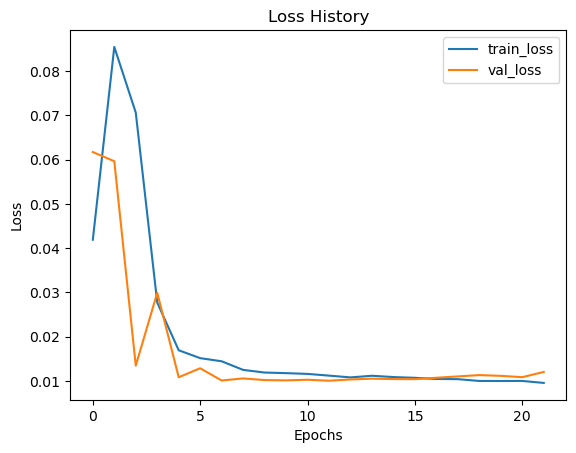

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

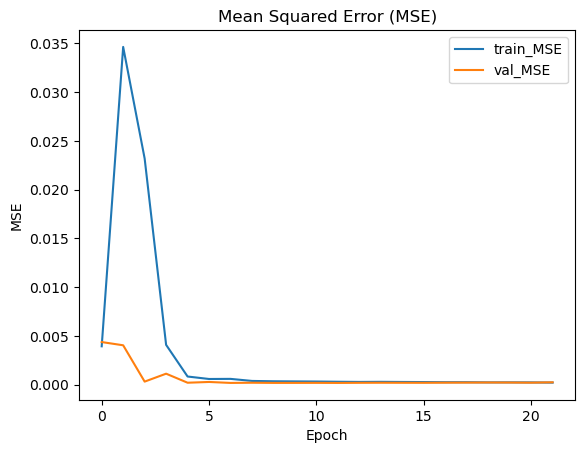

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

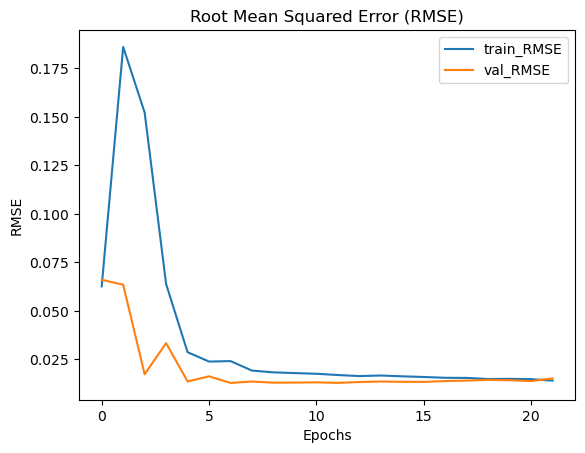

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

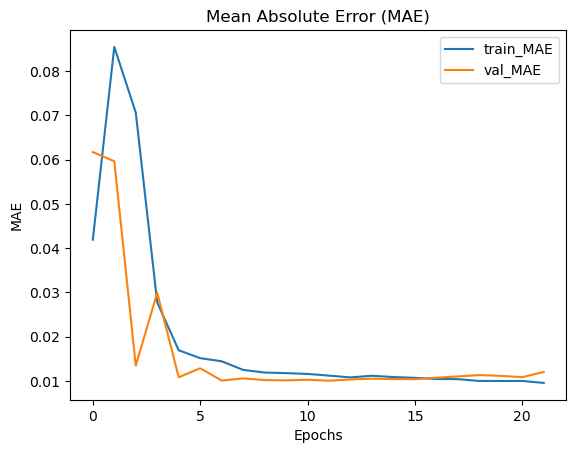

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

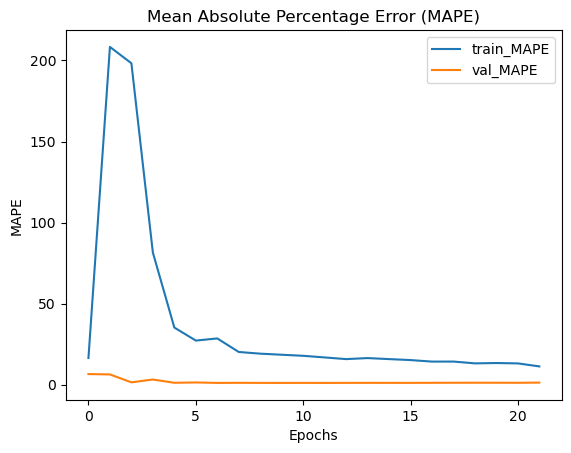

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:56:11.141459: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


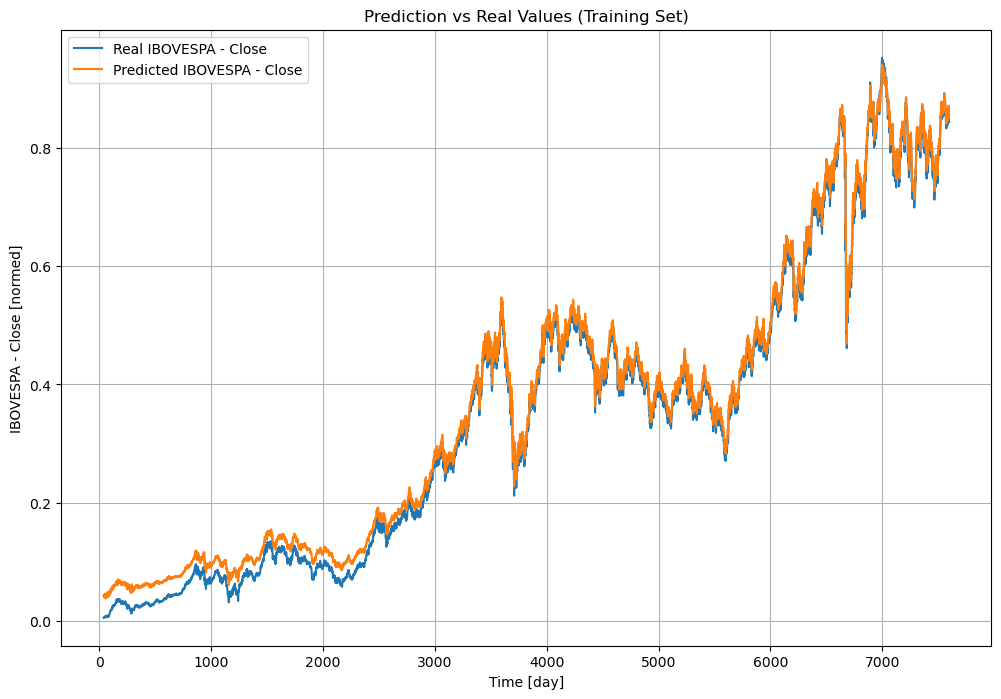

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


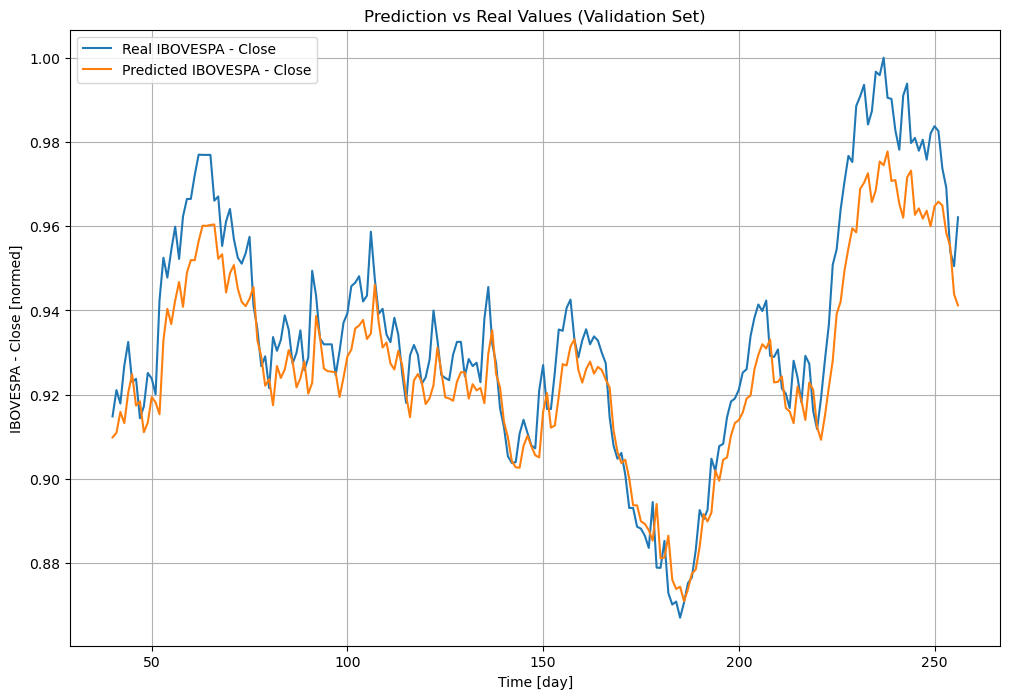

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


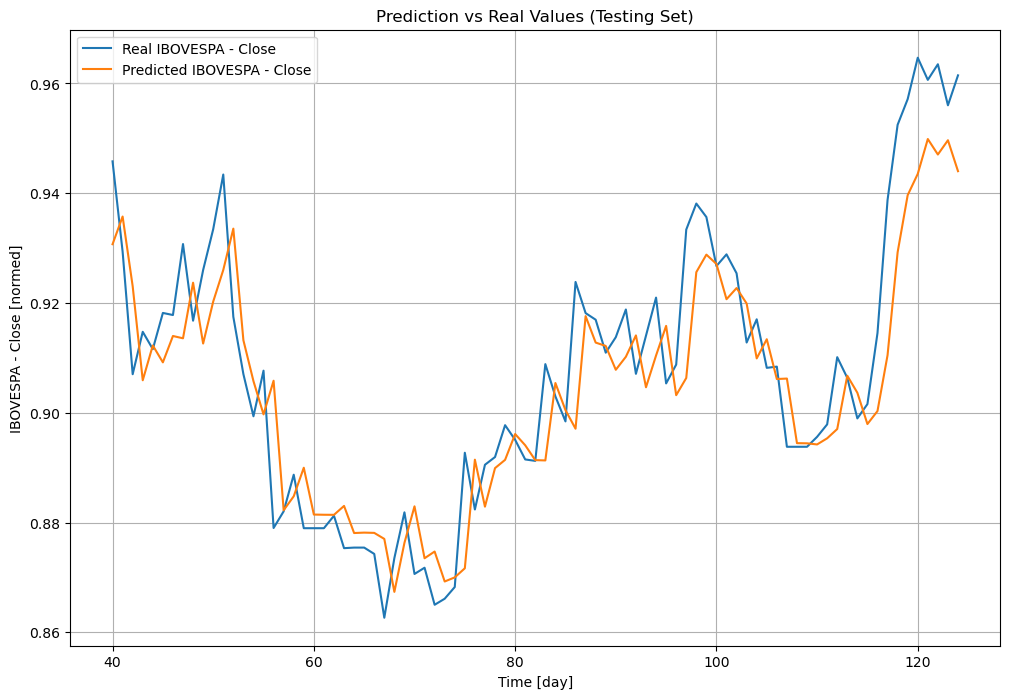

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

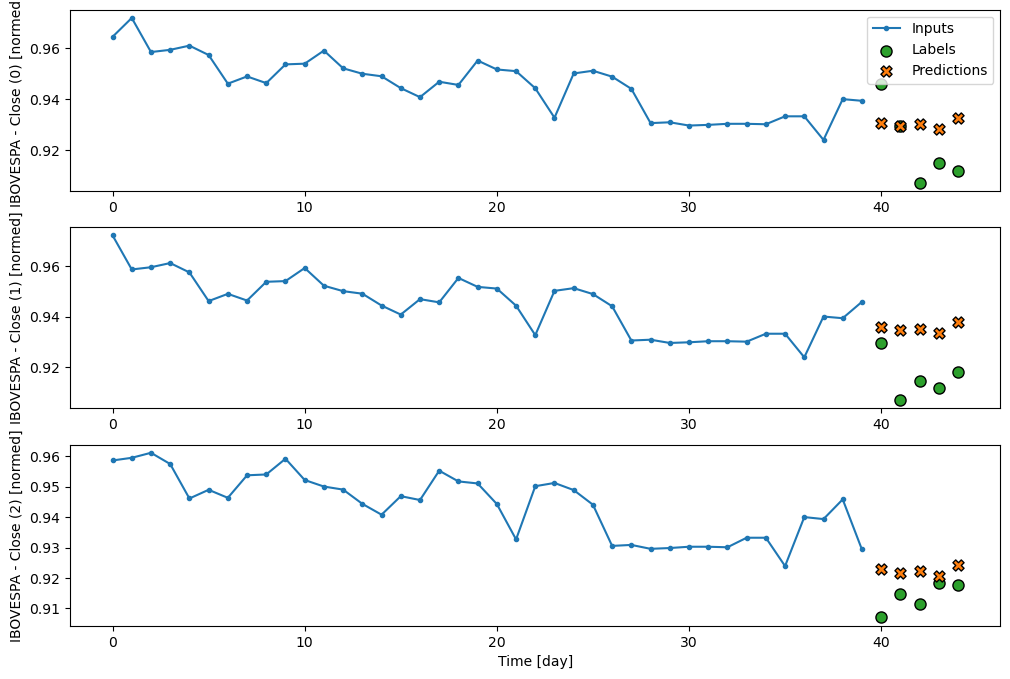

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:56s:333ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


array([[[0.9307109 , 0.9307109 , 0.9307109 , ..., 0.9307109 ,
         0.9307109 , 0.9307109 ],
        [0.9295609 , 0.9295609 , 0.9295609 , ..., 0.9295609 ,
         0.9295609 , 0.9295609 ],
        [0.9299916 , 0.9299916 , 0.9299916 , ..., 0.9299916 ,
         0.9299916 , 0.9299916 ],
        [0.9283739 , 0.9283739 , 0.9283739 , ..., 0.9283739 ,
         0.9283739 , 0.9283739 ],
        [0.9324598 , 0.9324598 , 0.9324598 , ..., 0.9324598 ,
         0.9324598 , 0.9324598 ]],

       [[0.93575513, 0.93575513, 0.93575513, ..., 0.93575513,
         0.93575513, 0.93575513],
        [0.934726  , 0.934726  , 0.934726  , ..., 0.934726  ,
         0.934726  , 0.934726  ],
        [0.93510413, 0.93510413, 0.93510413, ..., 0.93510413,
         0.93510413, 0.93510413],
        [0.93349385, 0.93349385, 0.93349385, ..., 0.93349385,
         0.93349385, 0.93349385],
        [0.93773246, 0.93773246, 0.93773246, ..., 0.93773246,
         0.93773234, 0.93773234]],

       [[0.9230527 , 0.9230527 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')